<img src="https://global.utsa.edu/tec-partnership/images/logos/logotipo-horizontal-azul-transparente.png"  width="600">

## **Avance 4: Proyecto Integrador**
## Visualización interactiva de calidad de aire en AR en aplicaciones móviles con análisis y forecasting con AI y ML
### **TC5035 - Proyecto Integrador (Gpo 10)**
### **Equipo #56**
#### Tecnológico de Monterrey
---
*   NOMBRE: Paulina Escalante Campbell
*   MATRÍCULA: A01191962


### **Objetivo**
---
**Optimización de hiperparámetros**

Cuando se trabaja en un proyecto de ML, es común explorar y comparar varios modelos para determinar cuál se ajusta mejor a los datos y produce las predicciones más precisas. Una vez que has establecido un modelo de referencia o baseline, es momento de construir modelos alternativos. Estos modelos pueden diferir en términos de complejidad, enfoque matemático, suposiciones subyacentes y la manera en que manejan los datos.

> Una vez que has obtenido un número considerable de modelos alternativos, enfócate en los más prometedores en términos de la métrica de desempeño que es importante para tu caso de negocio. Ahora necesitas ajustarlos…

Este avance implica construir múltiples modelos (individuales, no ensambles) relevantes para resolver el problema y evaluar su desempeño. Diferentes algoritmos pueden comportarse de manera óptima en diferentes tipos de datos o tareas. La construcción de modelos alternativos permite explorar y evaluar cuál de ellos proporciona el mejor rendimiento para un problema particular.
Además, los modelos se pueden ajustar para determinar si se puede mejorar su rendimiento. Diferentes configuraciones de hiperparámetros pueden afectar significativamente el rendimiento de un modelo. Construir modelos alternativos implica explorar y ajustar estos hiperparámetros para encontrar la configuración óptima.

Las siguientes son acciones que deberás abordar en este avance:
* Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.
* Comparar el rendimiento de los modelos obtenidos.
* Seleccionar los dos modelos que proporcionen el mejor rendimiento.
* Ajustar los dos mejores modelos.
* Elegir el modelo individual final.



### **Dataset Inicial**
---
Global Air Quality Dataset 🌍
Comprehensive Air Quality Measurements from Major Cities Worldwide 🌍
https://www.kaggle.com/datasets/sazidthe1/global-air-pollution-data/data

### Diccionario de variables del dataset de calidad del aire

| Columna               | Descripción                                                                                 |
|-----------------------|---------------------------------------------------------------------------------------------|
| `country_name`        | Name of the Country                                                                         |
| `city_name`           | Name of the City                                                                            |
| `aqi_value`           | Overall AQI value of the city                                                               |
| `aqi_category`        | Overall AQI category of the city                                                            |
| `co_aqi_value`        | AQI value of Carbon Monoxide of the city                                                    |
| `co_aqi_category`     | AQI category of Carbon Monoxide of the city                                                 |
| `ozone_aqi_value`     | AQI value of Ozone of the city                                                              |
| `ozone_aqi_category`  | AQI category of Ozone of the city                                                           |
| `no2_aqi_value`       | AQI value of Nitrogen Dioxide of the city                                                  |
| `no2_aqi_category`    | AQI category of Nitrogen Dioxide of the city                                               |
| `pm2.5_aqi_value`     | AQI value of Particulate Matter (≤ 2.5 micrometers) of the city                             |
| `pm2.5_aqi_category`  | AQI category of Particulate Matter (≤ 2.5 micrometers) of the city                          |



### **Leer archivos, imports y google cloud drive**

In [1]:
# Setup inicial del proyecto con GPU y google drive, conectar a runtime de T4GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

import psutil

ram_gb = psutil.virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

from google.colab import drive
drive.mount('/content/drive')

# Asegurarse que los datos han sido copiados a este directorio de google drive
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/ProyectoIntegrador"
os.chdir(DIR)

Mon Oct 20 02:50:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [76]:
# Imports para análisis de datos y visualizaciones
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Networking imports
import requests
import time
import unicodedata

# Normalizing
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, learning_curve

# Models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import pickle
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


# characteristics
from sklearn.feature_selection import (
    SelectKBest, f_regression, mutual_info_regression,
    RFE, SequentialFeatureSelector
)
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score
)

import warnings
warnings.filterwarnings('ignore')

In [20]:
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except:
    XGBOOST_AVAILABLE = False
    print("XGBoost no disponible")

print("*** Librerías cargadas ***")

*** Librerías cargadas ***


In [3]:
# Usar el dataset final del Avance 2 (con features seleccionadas), datos ya están preprocesados con el Avance 1, 2 y 3
df_selected = pd.read_csv('data_features_selected_clean.csv')  # 7 features seleccionadas + target

# Exploramos el modelo con dos posibles features
df = df_selected
df

,co_aqi_value,ozone_aqi_value,distance_from_equator,pm25_no2_ratio,ozone_co_ratio,country_mean_aqi,aqi_value
0,-0.257657,-1.010310,-1.609334,-0.429844,-1.493037,-0.836505,-0.609049
1,-0.257657,0.014283,0.441423,-0.399228,0.213691,-0.452705,-0.247782
2,-0.257657,-0.136393,1.461118,-0.440050,-0.037298,-0.663941,-0.710203
3,-0.257657,-0.106258,1.220933,-0.531899,0.012900,-0.750846,-0.305584
4,-0.257657,-0.287068,1.336271,-0.684980,-0.288288,-0.828714,-0.276683
...,...,...,...,...,...,...,...
16754,0.898454,3.660628,0.148227,-0.042038,2.271804,0.994122,1.110582
16755,-0.257657,0.014283,1.206799,-0.123682,0.213691,-0.328210,-0.175528
16756,0.898454,3.479818,-0.205231,0.403599,2.121211,1.673678,1.457398
16757,-0.257657,-0.558284,1.188464,-0.678176,-0.740068,-0.661446,-0.478993


In [4]:
df_selected.head(1)

,co_aqi_value,ozone_aqi_value,distance_from_equator,pm25_no2_ratio,ozone_co_ratio,country_mean_aqi,aqi_value
0,-0.257657,-1.01031,-1.609334,-0.429844,-1.493037,-0.836505,-0.609049


In [5]:
df.shape

(16759, 7)

#**Sección 1: Comparativa de Modelos**
---

La variable objetivo para el modelo es **aqi_value**, en el avance 3 se exploraron diferentes modelos para usar como baseline ya que no estabamos seguros de los datos y su comportamiento. Esta sección explorará algunos de esos modelos y unos nuevos.

Modelos propuestos:

* Linear Regression (baseline simple)
* Ridge Regression (regularización L2)
* Lasso Regression (regularización L1 + selección de features)
* Decision Tree Regressor (no lineal, interpretable)
* Random Forest Regressor (ensemble de árboles, robusto)
* Gradient Boosting Regressor (XGBoost o LightGBM - state-of-the-art)
* Support Vector Regressor (SVR) (efectivo en espacios de alta dimensionalidad)
* K-Nearest Neighbors (KNN) (basado en instancias)

Métricas a comparar:

* Principal: RMSE (Root Mean Squared Error) - penaliza errores grandes
* Secundaria 1: MAE (Mean Absolute Error) - interpretable en unidades de AQI
* Secundaria 2: R² Score - % de varianza explicada
* Tiempo de entrenamiento (segundos)


In [18]:
# Variable objetivo
target = 'aqi_value'

# Seleccionar columnas numéricas (excluir target)
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if target in numeric_columns:
    numeric_columns.remove(target)

# Crear X (features) y y (target)
X = df[numeric_columns].copy()
y = df[target].copy()

print(f"\n*** PREPARACIÓN ***")
print(f"Features (X): {X.shape[1]}")
print(f"Target (y): {target}")

# División train/test 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTrain: {X_train.shape[0]:,} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test: {X_test.shape[0]:,} ({X_test.shape[0]/len(X)*100:.1f}%)")



*** PREPARACIÓN ***
Features (X): 6
Target (y): aqi_value

Train: 13,407 (80.0%)
Test: 3,352 (20.0%)


In [19]:
# Función de Entrenamiento y Evaluación
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """
    Entrena un modelo y calcula métricas de evaluación

    Retorna:
    - Dictionary con métricas (RMSE, MAE, R2, tiempo)
    """

    # Entrenar modelo y medir tiempo
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas en Train
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Métricas en Test
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Validación cruzada (5-fold)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5,
                                 scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()

    return {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'CV_RMSE': cv_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Training_Time': training_time,
        'model_object': model
    }

print("*** Función definida ***")

*** Función definida ***


In [22]:
# Lista de modelos a entrenar
models = [
    (LinearRegression(), "Linear Regression"),
    (Ridge(alpha=1.0, random_state=42), "Ridge Regression"),
    (Lasso(alpha=1.0, random_state=42), "Lasso Regression"),
    (DecisionTreeRegressor(random_state=42), "Decision Tree"),
    (RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1), "Random Forest"),
    (GradientBoostingRegressor(n_estimators=100, random_state=42), "Gradient Boosting"),
    (SVR(kernel='rbf'), "Support Vector Regressor"),
    (KNeighborsRegressor(n_neighbors=5), "K-Nearest Neighbors")
]

if XGBOOST_AVAILABLE:
    models.append((xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1), "XGBoost"))

print(f"*** {len(models)} modelos definidos ***")

*** 9 modelos definidos ***


### **Entrenar Modelos**

In [23]:
print("\n" + "="*80)
print("*** ENTRENAMIENTO INICIADO ***")
print("="*80)

results = []

for model, model_name in models:
    print(f"\nEntrenando: {model_name}...")
    result = train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test)
    results.append(result)
    print(f"   Completado en {result['Training_Time']:.2f}s")
    print(f"   Test RMSE: {result['Test_RMSE']:.4f} | MAE: {result['Test_MAE']:.4f} | R²: {result['Test_R2']:.4f}")

print("\n" + "="*80)
print("*** ENTRENAMIENTO COMPLETADO ***")
print("="*80)


*** ENTRENAMIENTO INICIADO ***

Entrenando: Linear Regression...
   Completado en 0.03s
   Test RMSE: 0.5425 | MAE: 0.3244 | R²: 0.7083

Entrenando: Ridge Regression...
   Completado en 0.00s
   Test RMSE: 0.5425 | MAE: 0.3244 | R²: 0.7083

Entrenando: Lasso Regression...
   Completado en 0.00s
   Test RMSE: 1.0044 | MAE: 0.6970 | R²: -0.0002

Entrenando: Decision Tree...
   Completado en 0.12s
   Test RMSE: 0.4281 | MAE: 0.1549 | R²: 0.8183

Entrenando: Random Forest...
   Completado en 1.13s
   Test RMSE: 0.3550 | MAE: 0.1476 | R²: 0.8750

Entrenando: Gradient Boosting...
   Completado en 1.52s
   Test RMSE: 0.4571 | MAE: 0.2343 | R²: 0.7929

Entrenando: Support Vector Regressor...
   Completado en 4.11s
   Test RMSE: 0.5028 | MAE: 0.2140 | R²: 0.7494

Entrenando: K-Nearest Neighbors...
   Completado en 0.01s
   Test RMSE: 0.4135 | MAE: 0.1743 | R²: 0.8305

Entrenando: XGBoost...
   Completado en 1.41s
   Test RMSE: 0.3870 | MAE: 0.1840 | R²: 0.8515

*** ENTRENAMIENTO COMPLETADO ***

### **Tabla de Resultados de Modelos**

In [24]:
# Crear DataFrame con resultados
results_df = pd.DataFrame(results)
results_display = results_df.drop('model_object', axis=1)
results_display = results_display.sort_values('Test_RMSE', ascending=True).reset_index(drop=True)

# Formatear para visualización
results_formatted = results_display.copy()
results_formatted['Train_RMSE'] = results_formatted['Train_RMSE'].map('{:.4f}'.format)
results_formatted['Test_RMSE'] = results_formatted['Test_RMSE'].map('{:.4f}'.format)
results_formatted['CV_RMSE'] = results_formatted['CV_RMSE'].map('{:.4f}'.format)
results_formatted['Train_MAE'] = results_formatted['Train_MAE'].map('{:.4f}'.format)
results_formatted['Test_MAE'] = results_formatted['Test_MAE'].map('{:.4f}'.format)
results_formatted['Train_R2'] = results_formatted['Train_R2'].map('{:.4f}'.format)
results_formatted['Test_R2'] = results_formatted['Test_R2'].map('{:.4f}'.format)
results_formatted['Training_Time'] = results_formatted['Training_Time'].map('{:.2f}s'.format)

print("\n*** TABLA COMPARATIVA (ordenada por Test RMSE) ***\n")
print(results_formatted.to_string(index=False))

# Identificar TOP 2 modelos
top_2_models = results_display.head(2)

print("\n" + "="*80)
print("*** TOP 2 MODELOS ***")
print("="*80)

for idx, row in top_2_models.iterrows():
    print(f"\n{idx+1}. {row['Model']}")
    print(f"   Test RMSE: {row['Test_RMSE']:.4f}")
    print(f"   Test MAE:  {row['Test_MAE']:.4f}")
    print(f"   Test R²:   {row['Test_R2']:.4f}")
    print(f"   Tiempo:    {row['Training_Time']:.2f}s")


*** TABLA COMPARATIVA (ordenada por Test RMSE) ***

                   Model Train_RMSE Test_RMSE CV_RMSE Train_MAE Test_MAE Train_R2 Test_R2 Training_Time
           Random Forest     0.1246    0.3550  0.3513    0.0541   0.1476   0.9844  0.8750         1.13s
                 XGBoost     0.1964    0.3870  0.3735    0.1196   0.1840   0.9613  0.8515         1.41s
     K-Nearest Neighbors     0.2932    0.4135  0.3890    0.1329   0.1743   0.9139  0.8305         0.01s
           Decision Tree     0.0000    0.4281  0.4659    0.0000   0.1549   1.0000  0.8183         0.12s
       Gradient Boosting     0.3888    0.4571  0.4154    0.2171   0.2343   0.8485  0.7929         1.52s
Support Vector Regressor     0.4415    0.5028  0.4511    0.2023   0.2140   0.8046  0.7494         4.11s
       Linear Regression     0.5317    0.5425  0.5343    0.3229   0.3244   0.7166  0.7083         0.03s
        Ridge Regression     0.5317    0.5425  0.5343    0.3229   0.3244   0.7166  0.7083         0.00s
        Las

###**Helper function de visualizaciones**

In [34]:
# Definir función de visualización para los resultados de los modelos
def visualizar_modelo_individual(row):
    """
    Genera una visualización completa para un modelo individual

    Parámetros:
    - row: Fila del DataFrame con las métricas del modelo

    La visualización incluye 4 subplots:
    1. RMSE (Train, Test, CV)
    2. MAE (Train, Test)
    3. R² Score (Train, Test)
    4. Resumen de métricas y análisis de generalización
    """

    model_name = row['Model']

    # Crear figura con subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Análisis Completo: {model_name}', fontsize=16, fontweight='bold', y=0.995)

    # SUBPLOT 1: RMSE (Train vs Test vs CV)
    ax1 = axes[0, 0]
    categories = ['Train', 'Test', 'CV (5-fold)']
    rmse_values = [row['Train_RMSE'], row['Test_RMSE'], row['CV_RMSE']]
    colors = ['skyblue', 'coral', 'lightgreen']

    bars1 = ax1.bar(categories, rmse_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax1.set_ylabel('RMSE', fontsize=11, fontweight='bold')
    ax1.set_title('RMSE por Conjunto de Datos', fontsize=12, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)

    # Agregar valores en las barras
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # SUBPLOT 2: MAE (Train vs Test)
    ax2 = axes[0, 1]
    categories = ['Train', 'Test']
    mae_values = [row['Train_MAE'], row['Test_MAE']]
    colors = ['mediumpurple', 'orange']

    bars2 = ax2.bar(categories, mae_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax2.set_ylabel('MAE', fontsize=11, fontweight='bold')
    ax2.set_title('MAE (Mean Absolute Error)', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)

    # Agregar valores en las barras
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # SUBPLOT 3: R² Score (Train vs Test)
    ax3 = axes[1, 0]
    categories = ['Train', 'Test']
    r2_values = [row['Train_R2'], row['Test_R2']]
    colors = ['teal', 'crimson']

    bars3 = ax3.bar(categories, r2_values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    ax3.set_ylabel('R² Score', fontsize=11, fontweight='bold')
    ax3.set_title('R² Score (Coeficiente de Determinación)', fontsize=12, fontweight='bold')
    ax3.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
    ax3.axhline(y=1, color='green', linestyle='--', linewidth=1.5, alpha=0.5)
    ax3.grid(axis='y', alpha=0.3)

    # Agregar valores en las barras
    for bar in bars3:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # SUBPLOT 4: Resumen de Métricas y Análisis
    ax4 = axes[1, 1]
    ax4.axis('off')

    # Calcular diferencias para análisis de overfitting
    rmse_diff = row['Train_RMSE'] - row['Test_RMSE']
    mae_diff = row['Train_MAE'] - row['Test_MAE']
    r2_diff = row['Train_R2'] - row['Test_R2']

    # Determinar estado de generalización
    if abs(rmse_diff) < 1 and abs(r2_diff) < 0.05:
        generalization_status = "ACCEPT - Excelente generalización"
        status_color = 'green'
    elif rmse_diff < -2 or r2_diff < -0.1:
        generalization_status = "REJECT - Alto overfitting"
        status_color = 'red'
    elif rmse_diff > 2:
        generalization_status = "REJECT - Alto underfitting"
        status_color = 'orange'
    else:
        generalization_status = "ACCEPT - Generalización aceptable"
        status_color = 'blue'

    # Crear texto de resumen
    summary_text = f"""
    *** RESUMEN DE MÉTRICAS ***

    RMSE (menor es mejor):
      • Train: {row['Train_RMSE']:.4f}
      • Test:  {row['Test_RMSE']:.4f}
      • CV:    {row['CV_RMSE']:.4f}

    MAE (menor es mejor):
      • Train: {row['Train_MAE']:.4f}
      • Test:  {row['Test_MAE']:.4f}

    R² Score (mayor es mejor):
      • Train: {row['Train_R2']:.4f}
      • Test:  {row['Test_R2']:.4f}

    Tiempo de Entrenamiento:
      • {row['Training_Time']:.3f} segundos

    *** ANÁLISIS DE GENERALIZACIÓN ***

    Diferencias (Train - Test):
      • RMSE: {rmse_diff:+.4f}
      • MAE:  {mae_diff:+.4f}
      • R²:   {r2_diff:+.4f}

    Estado: {generalization_status}
    """

    # Agregar texto al subplot
    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes,
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

    # Agregar indicador de estado con color
    ax4.text(0.5, 0.02, f'Estado: {generalization_status.split(" - ")[0]}',
            transform=ax4.transAxes, fontsize=12, fontweight='bold',
            ha='center', color=status_color,
            bbox=dict(boxstyle='round', facecolor='white', edgecolor=status_color, linewidth=2))

    plt.tight_layout()
    plt.show()

In [35]:
# Lista de modelos para visualización (mismo orden que la definición original)
models_to_visualize = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "Support Vector Regressor",
    "K-Nearest Neighbors"
]

### **Linear Regression (baseline simple)**


Generando visualización para: Linear Regression


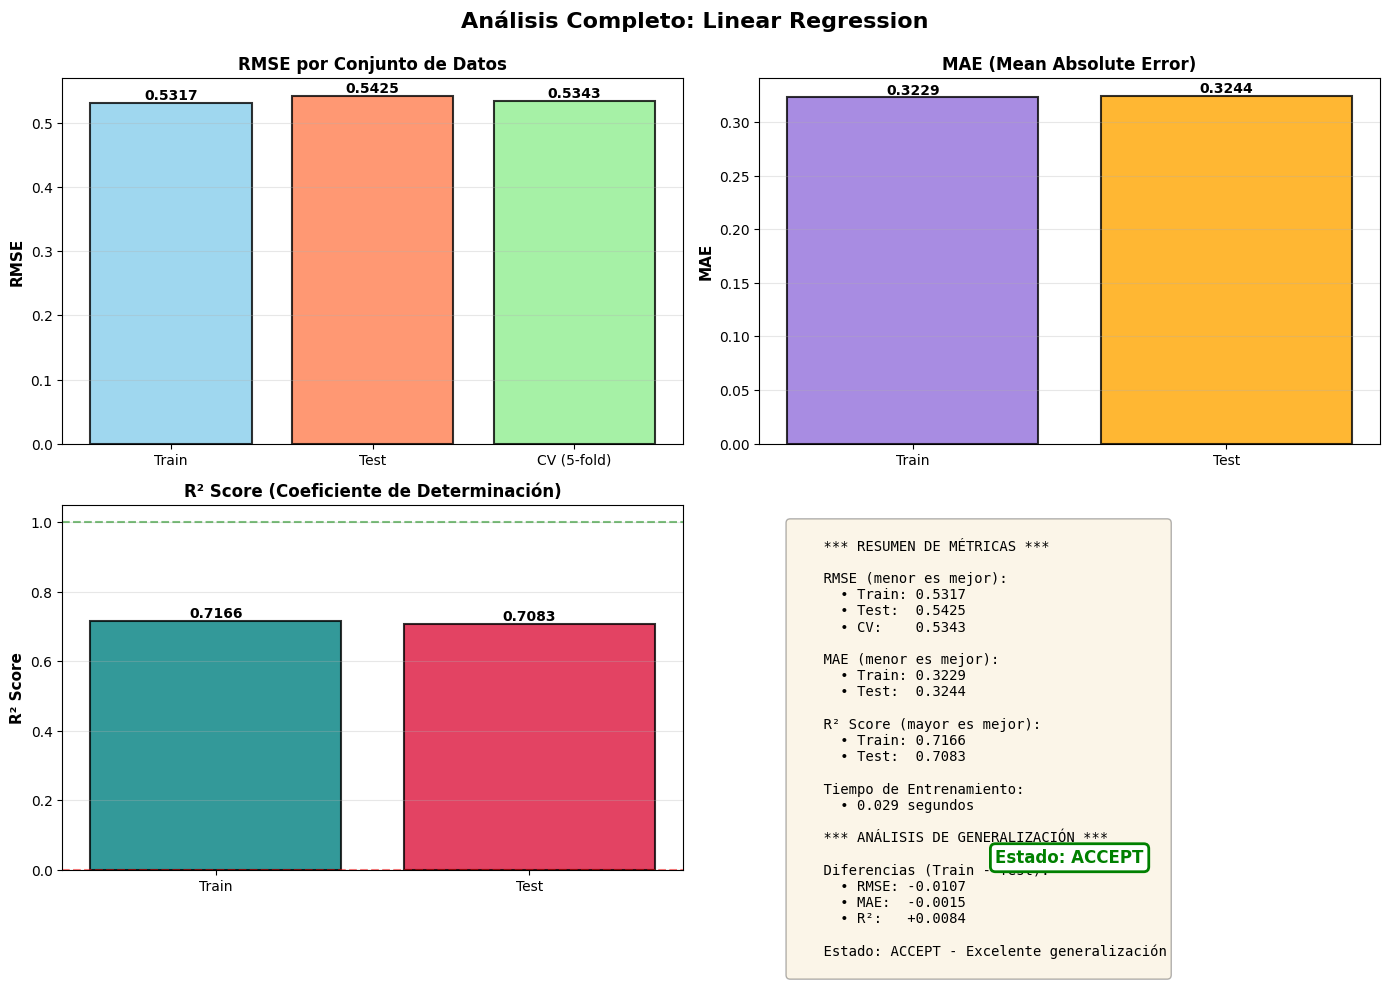

In [38]:
model_name = models_to_visualize[0]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **Ridge Regression (regularización L2)**


Generando visualización para: Ridge Regression


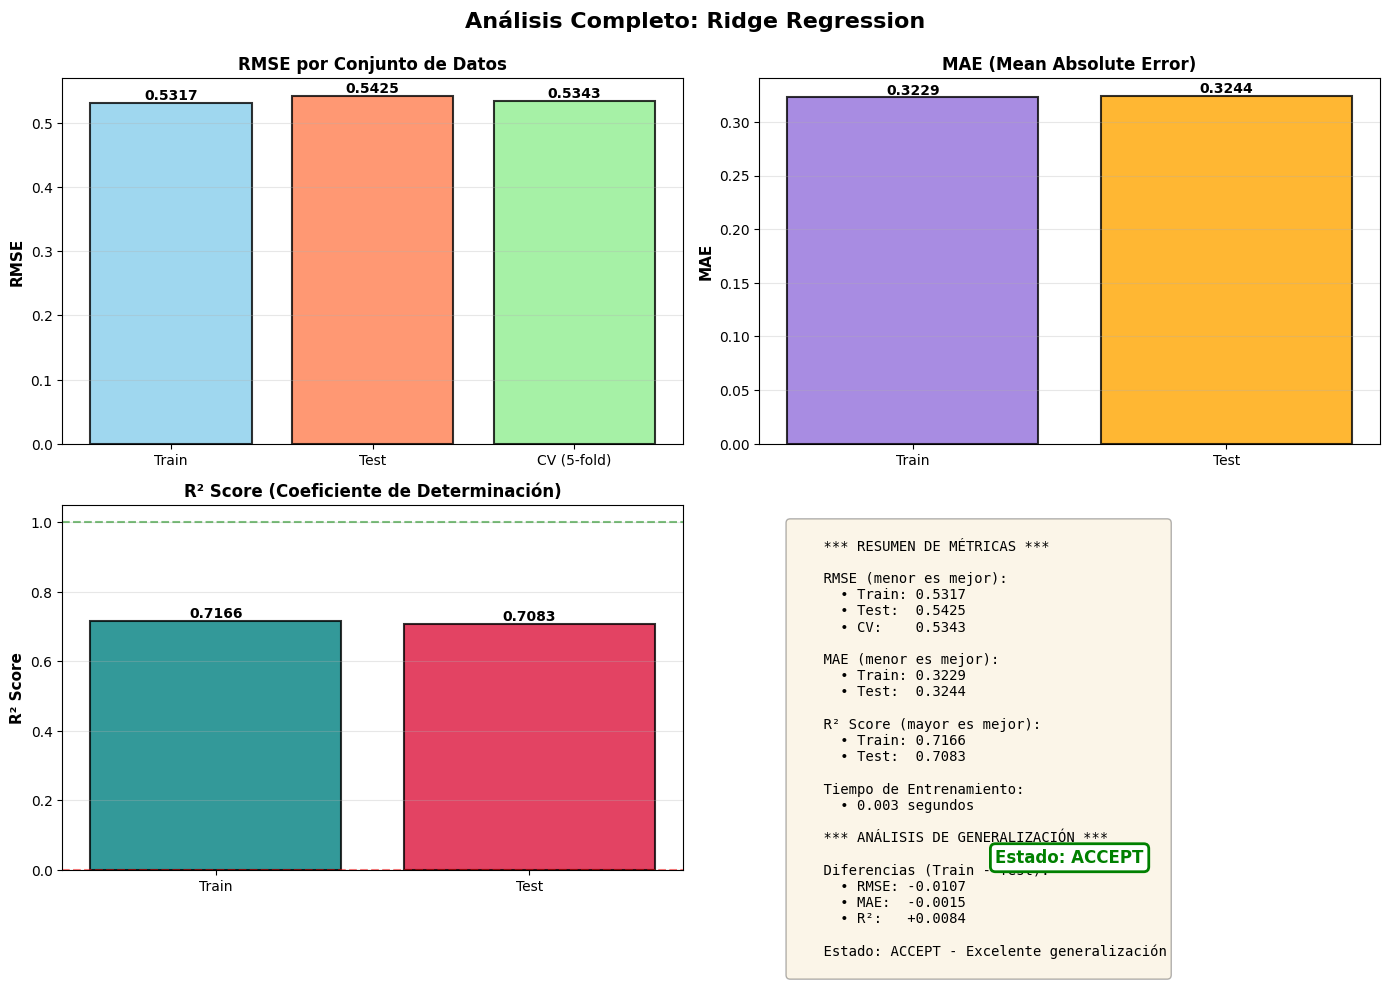

In [41]:
model_name = models_to_visualize[1]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **Lasso Regression (regularización L1 + selección de features)**


Generando visualización para: Lasso Regression


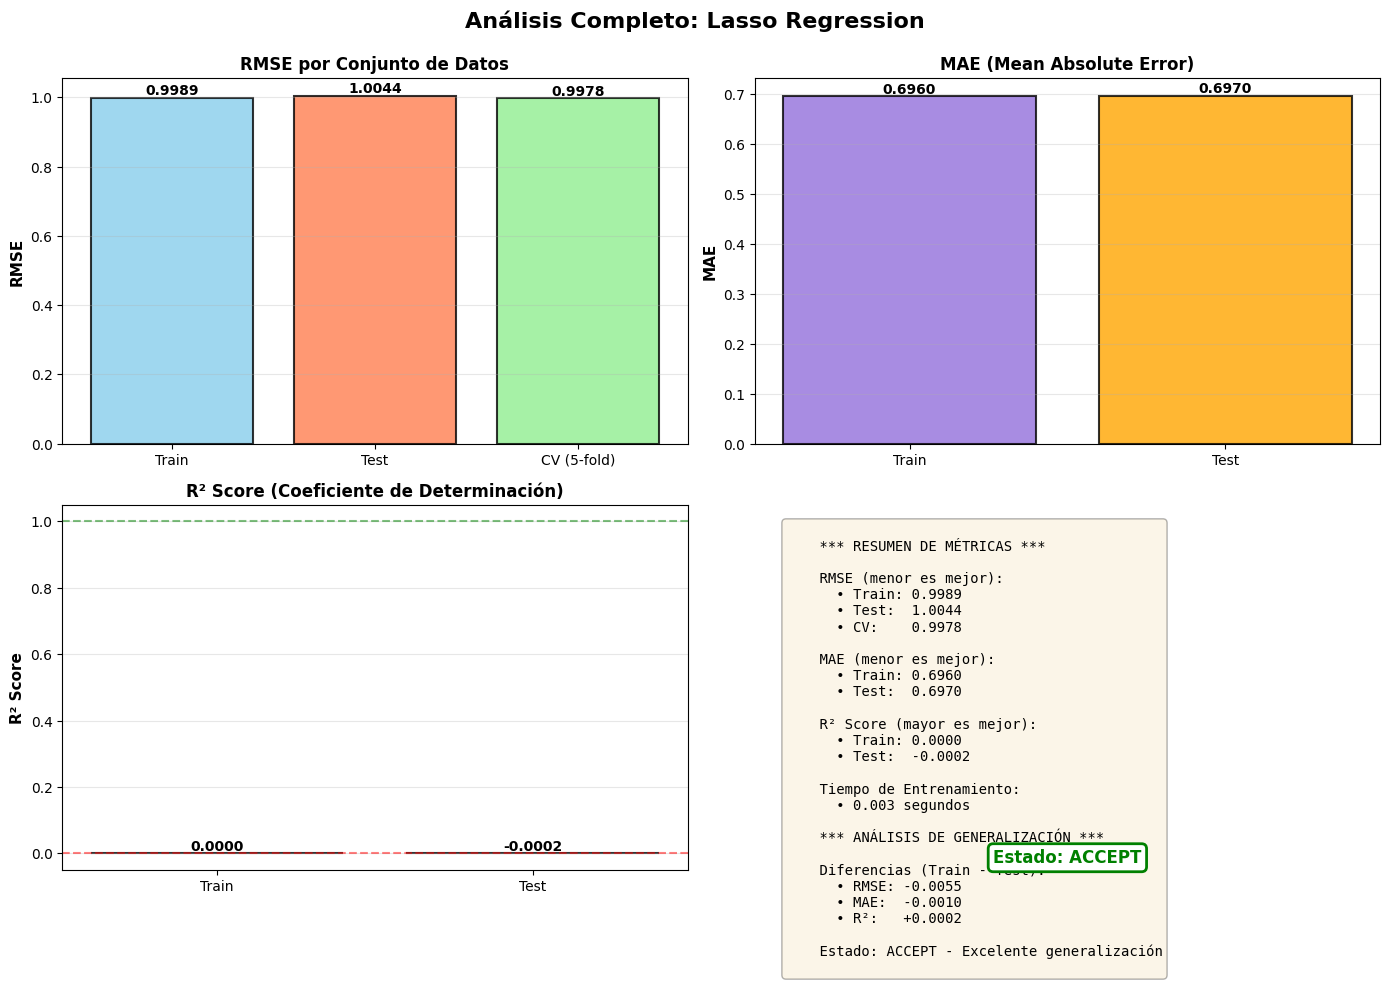

In [42]:
model_name = models_to_visualize[2]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **Decision Tree Regressor (no lineal, interpretable)**


Generando visualización para: Decision Tree


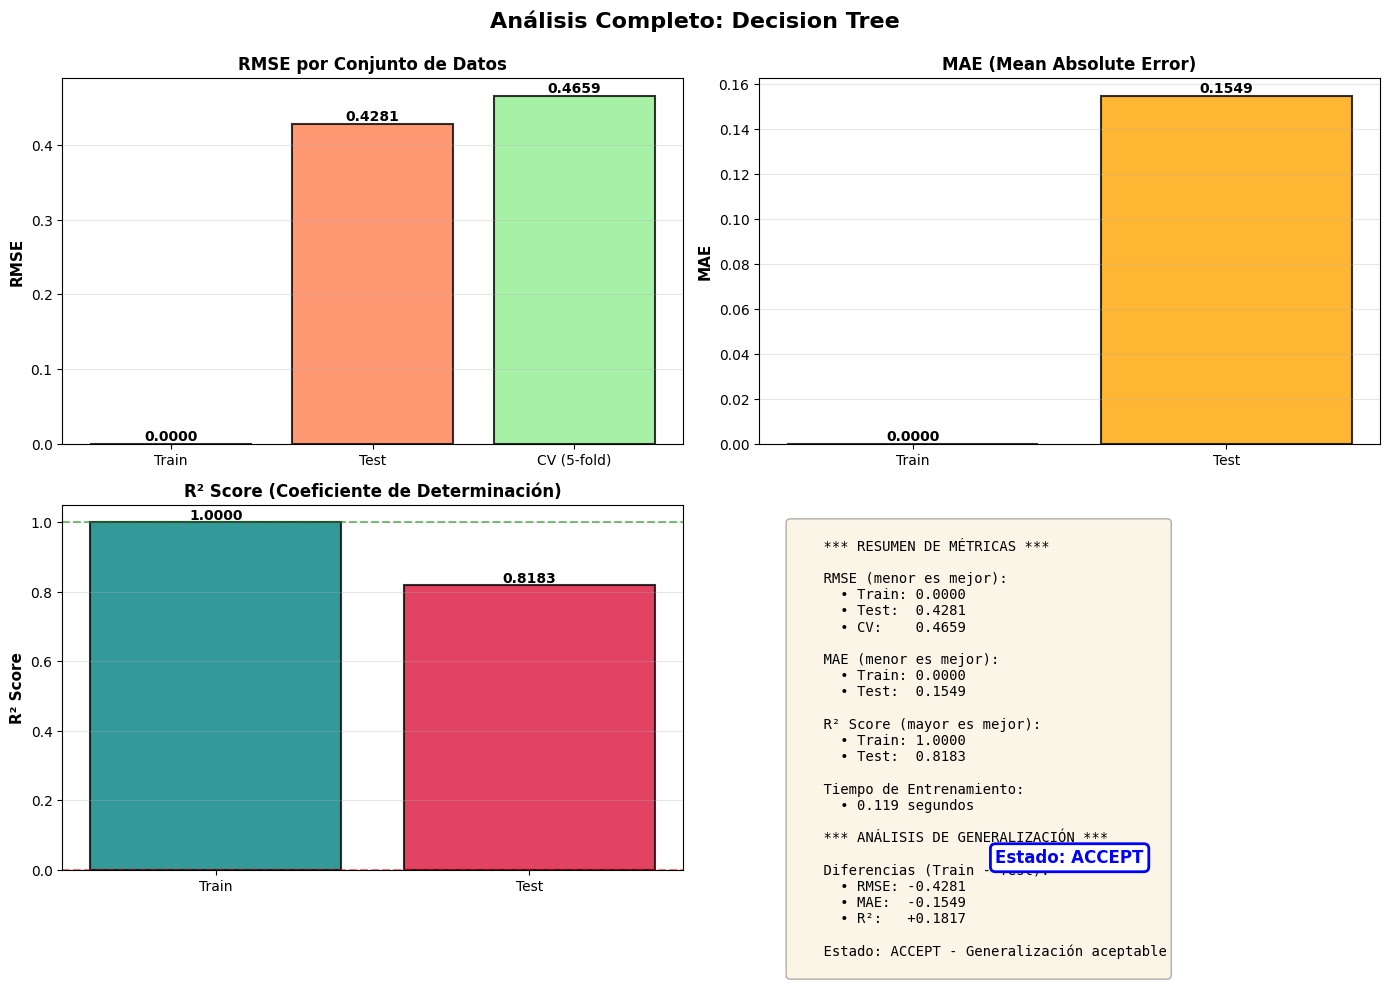

In [43]:
model_name = models_to_visualize[3]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **Random Forest Regressor (ensemble de árboles, robusto)**


Generando visualización para: Random Forest


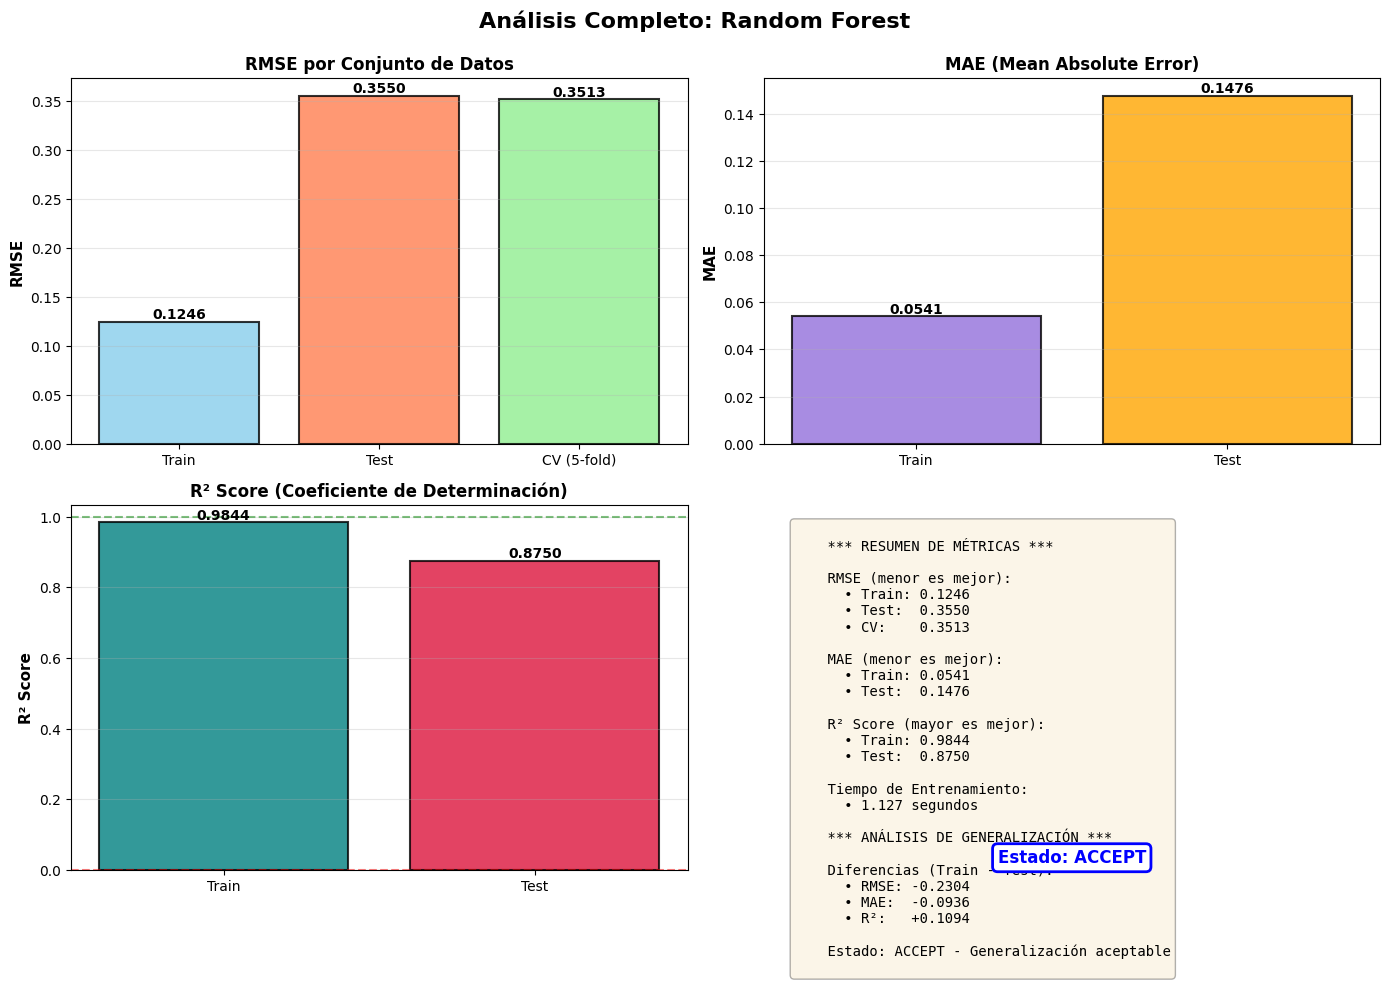

In [44]:
model_name = models_to_visualize[4]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **Gradient Boosting Regressor (XGBoost o LightGBM)**


Generando visualización para: Gradient Boosting


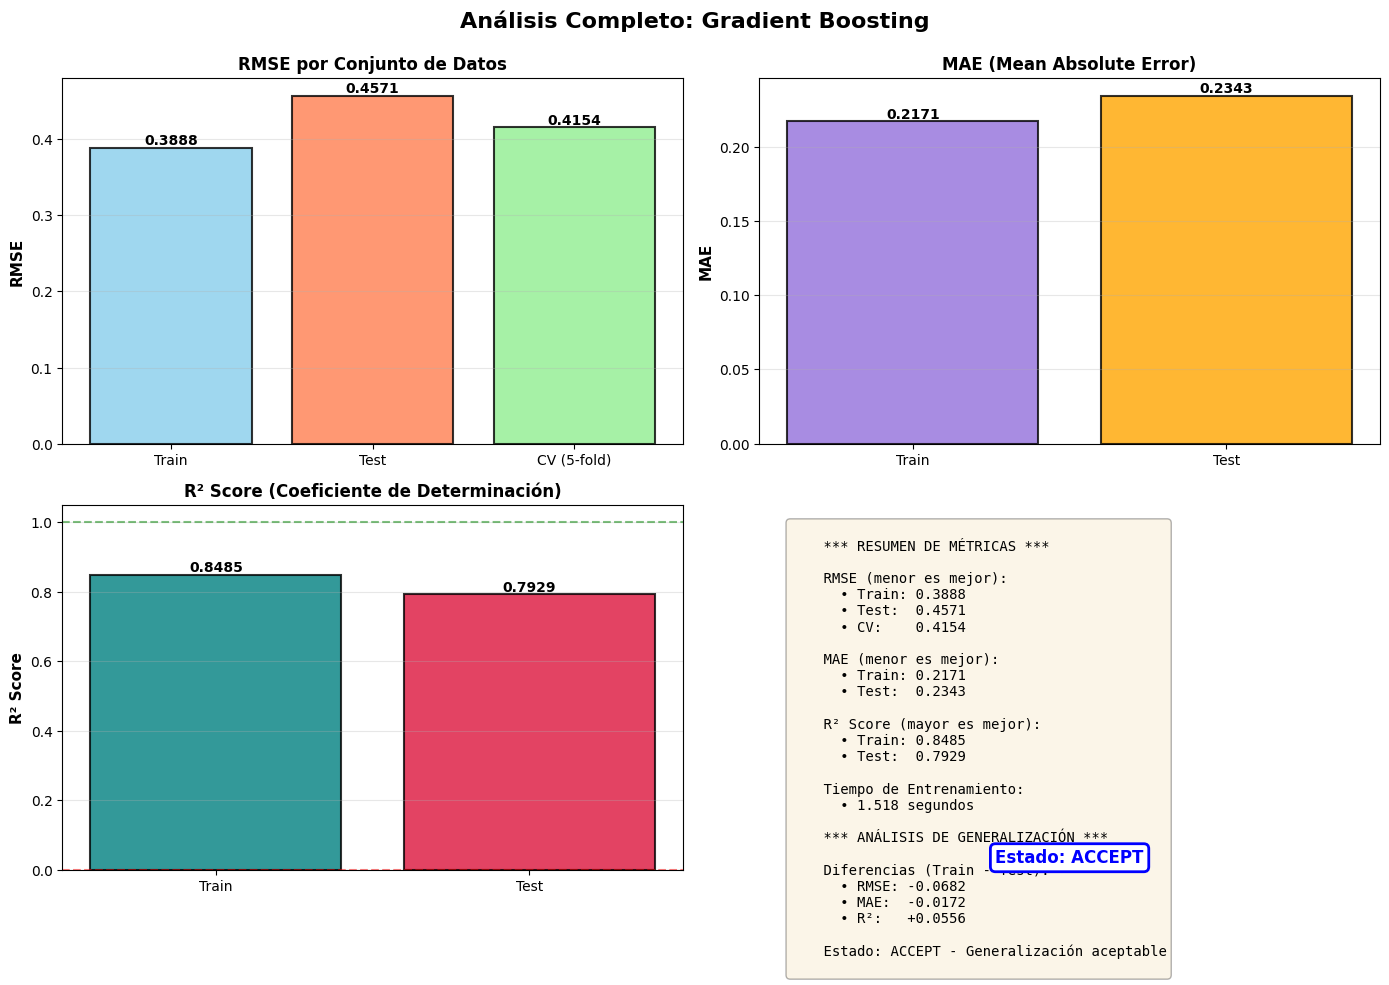

In [45]:
model_name = models_to_visualize[5]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **Support Vector Regressor (SVR) (efectivo en espacios de alta dimensionalidad)**


Generando visualización para: Support Vector Regressor


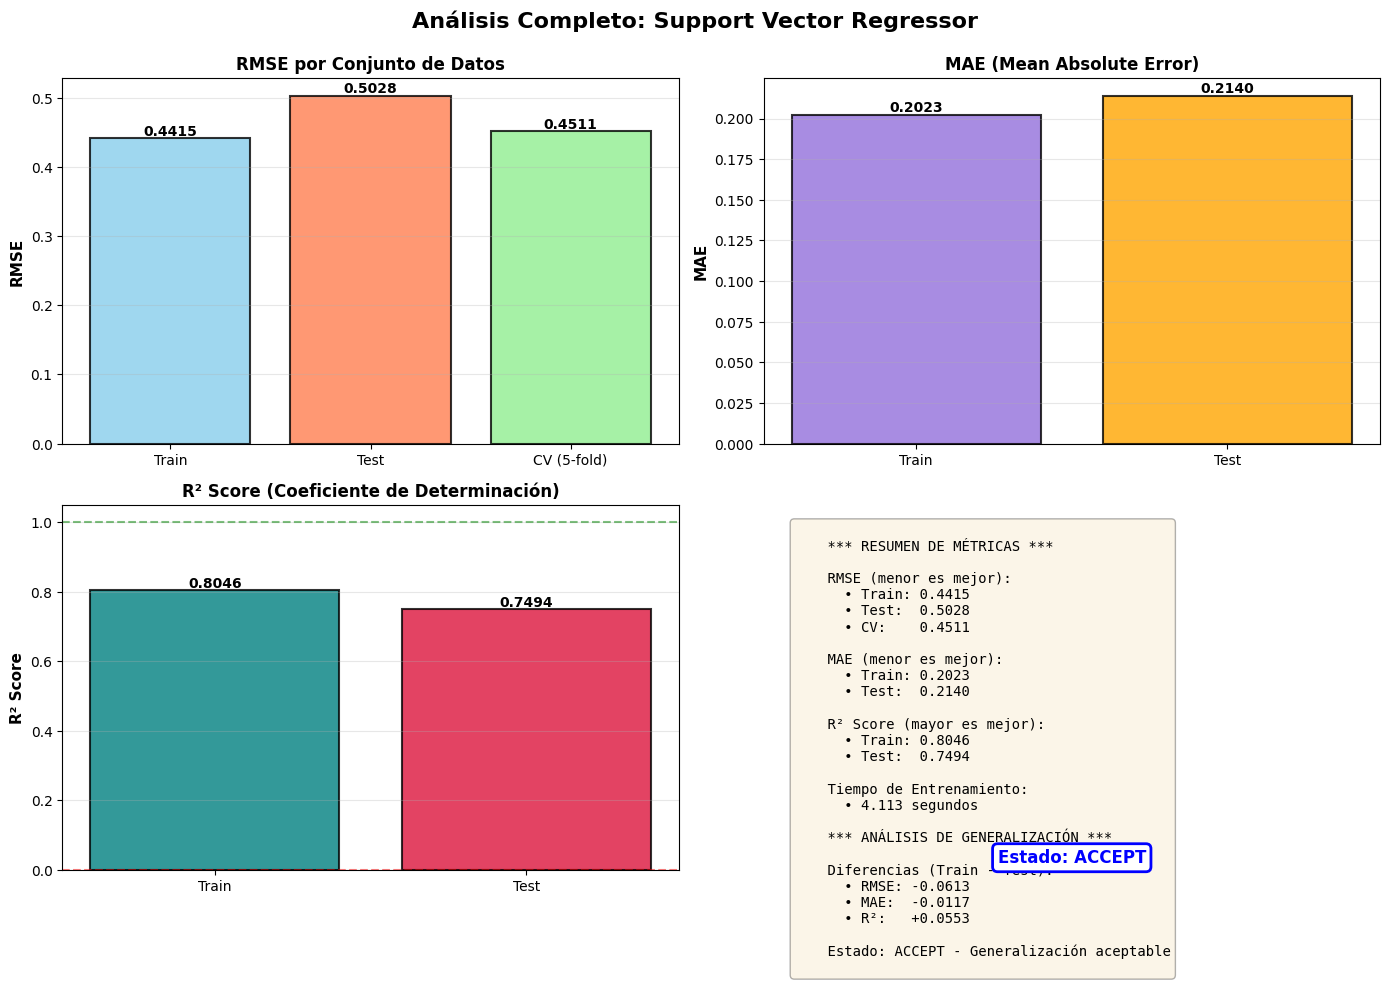

In [46]:
model_name = models_to_visualize[6]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **K-Nearest Neighbors (KNN) (basado en instancias)**


Generando visualización para: K-Nearest Neighbors


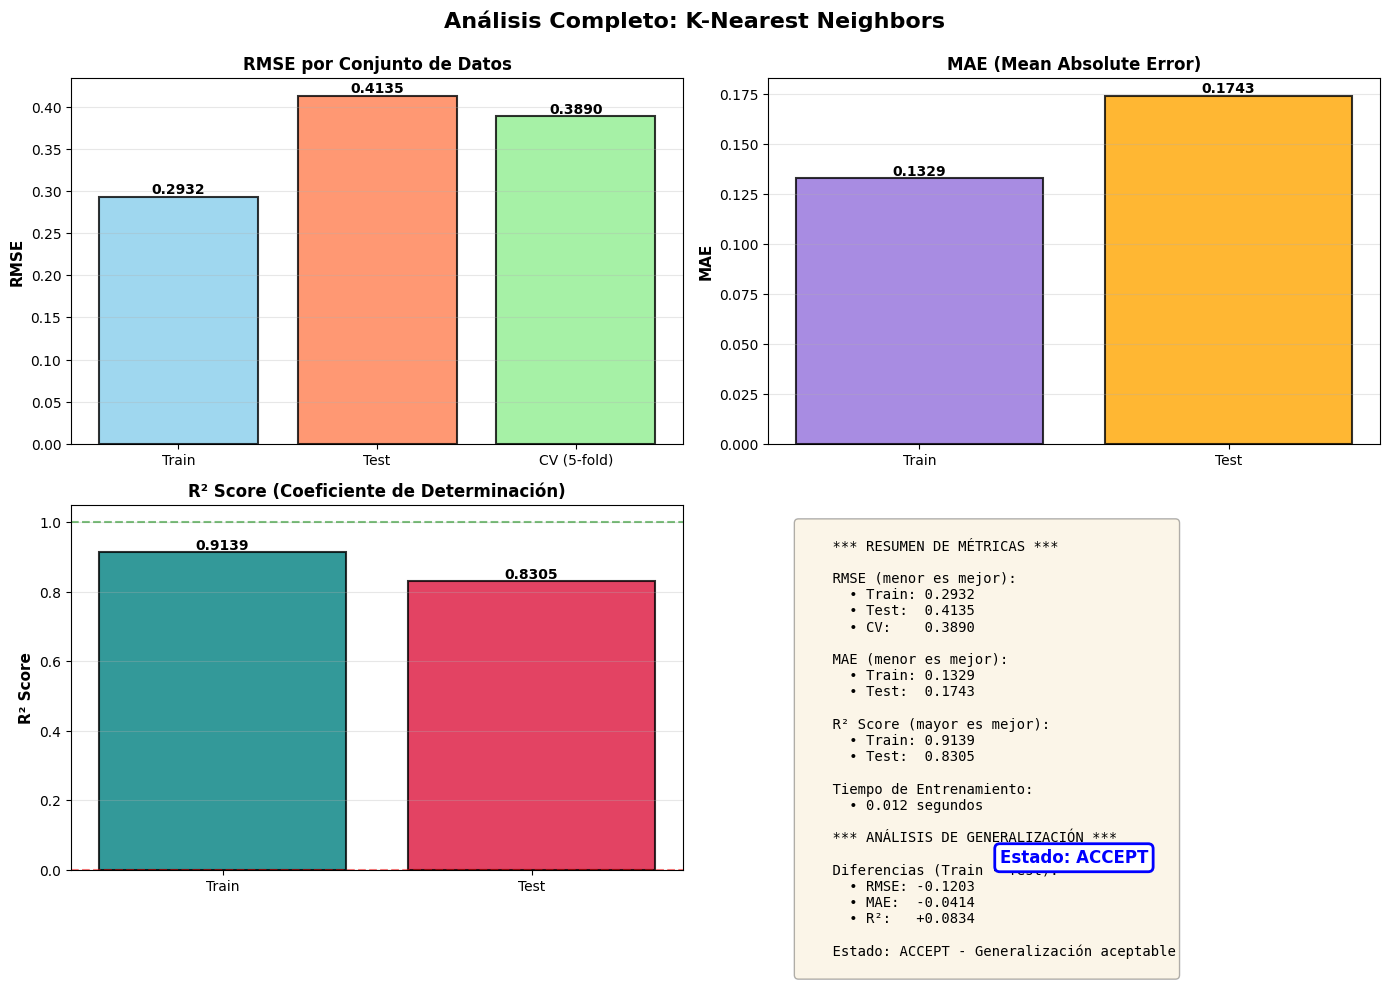

In [47]:
model_name = models_to_visualize[7]
# Buscar la fila correspondiente al modelo en results_display
model_row = results_display[results_display['Model'] == model_name]

print(f"\nGenerando visualización para: {model_name}")

# Obtener la primera (y única) fila como Series
model_data = model_row.iloc[0]

visualizar_modelo_individual(model_data)

### **Comparaciones por modelo**


*** VISUALIZACIONES COMPARATIVAS ***


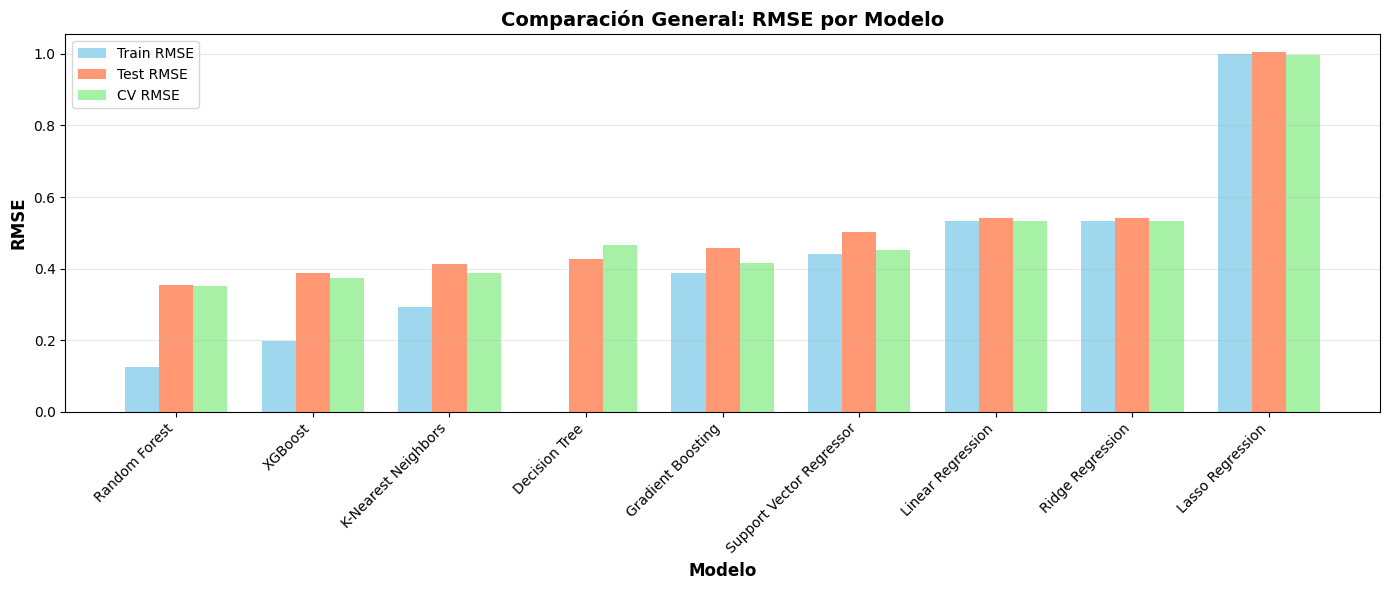

Figura comparativa 1: RMSE completada


In [27]:
print("\n" + "=" * 80)
print("*** VISUALIZACIONES COMPARATIVAS ***")
print("=" * 80)

# VISUALIZACIÓN COMPARATIVA 1: RMSE
plt.figure(figsize=(14, 6))
results_viz = results_display.sort_values('Test_RMSE', ascending=True)
x = np.arange(len(results_viz))
width = 0.25

plt.bar(x - width, results_viz['Train_RMSE'], width, label='Train RMSE', alpha=0.8, color='skyblue')
plt.bar(x, results_viz['Test_RMSE'], width, label='Test RMSE', alpha=0.8, color='coral')
plt.bar(x + width, results_viz['CV_RMSE'], width, label='CV RMSE', alpha=0.8, color='lightgreen')

plt.xlabel('Modelo', fontsize=12, fontweight='bold')
plt.ylabel('RMSE', fontsize=12, fontweight='bold')
plt.title('Comparación General: RMSE por Modelo', fontsize=14, fontweight='bold')
plt.xticks(x, results_viz['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Figura comparativa 1: RMSE completada")

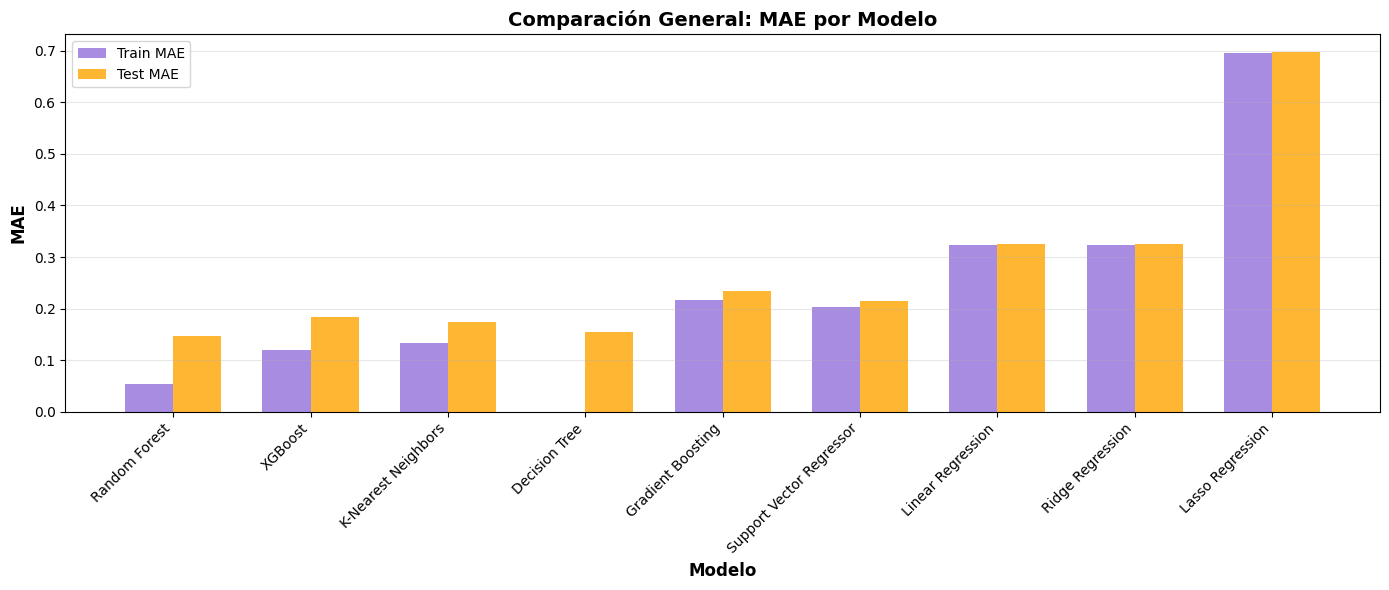

Figura comparativa 2: MAE completada


In [28]:
plt.figure(figsize=(14, 6))
x = np.arange(len(results_viz))
width = 0.35

plt.bar(x - width/2, results_viz['Train_MAE'], width, label='Train MAE', alpha=0.8, color='mediumpurple')
plt.bar(x + width/2, results_viz['Test_MAE'], width, label='Test MAE', alpha=0.8, color='orange')

plt.xlabel('Modelo', fontsize=12, fontweight='bold')
plt.ylabel('MAE', fontsize=12, fontweight='bold')
plt.title('Comparación General: MAE por Modelo', fontsize=14, fontweight='bold')
plt.xticks(x, results_viz['Model'], rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Figura comparativa 2: MAE completada")

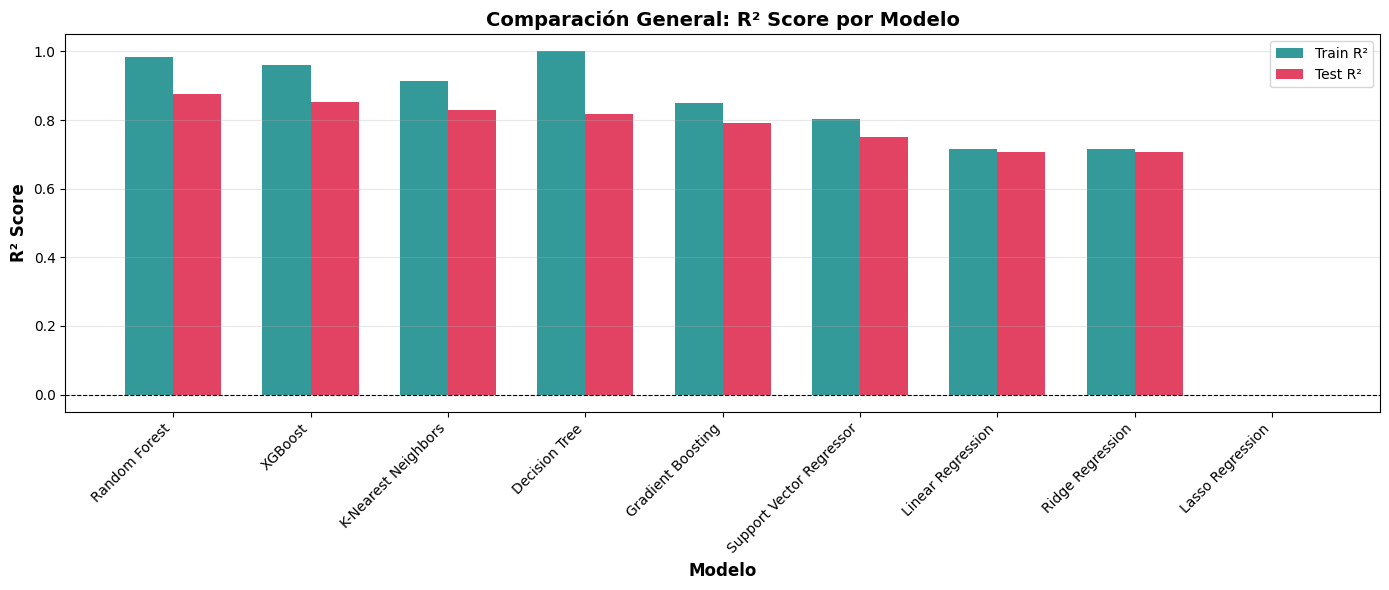

In [29]:
# VISUALIZACIÓN COMPARATIVA 3: R²
plt.figure(figsize=(14, 6))
x = np.arange(len(results_viz))
width = 0.35

plt.bar(x - width/2, results_viz['Train_R2'], width, label='Train R²', alpha=0.8, color='teal')
plt.bar(x + width/2, results_viz['Test_R2'], width, label='Test R²', alpha=0.8, color='crimson')

plt.xlabel('Modelo', fontsize=12, fontweight='bold')
plt.ylabel('R² Score', fontsize=12, fontweight='bold')
plt.title('Comparación General: R² Score por Modelo', fontsize=14, fontweight='bold')
plt.xticks(x, results_viz['Model'], rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### **Análisis de Overfitting**

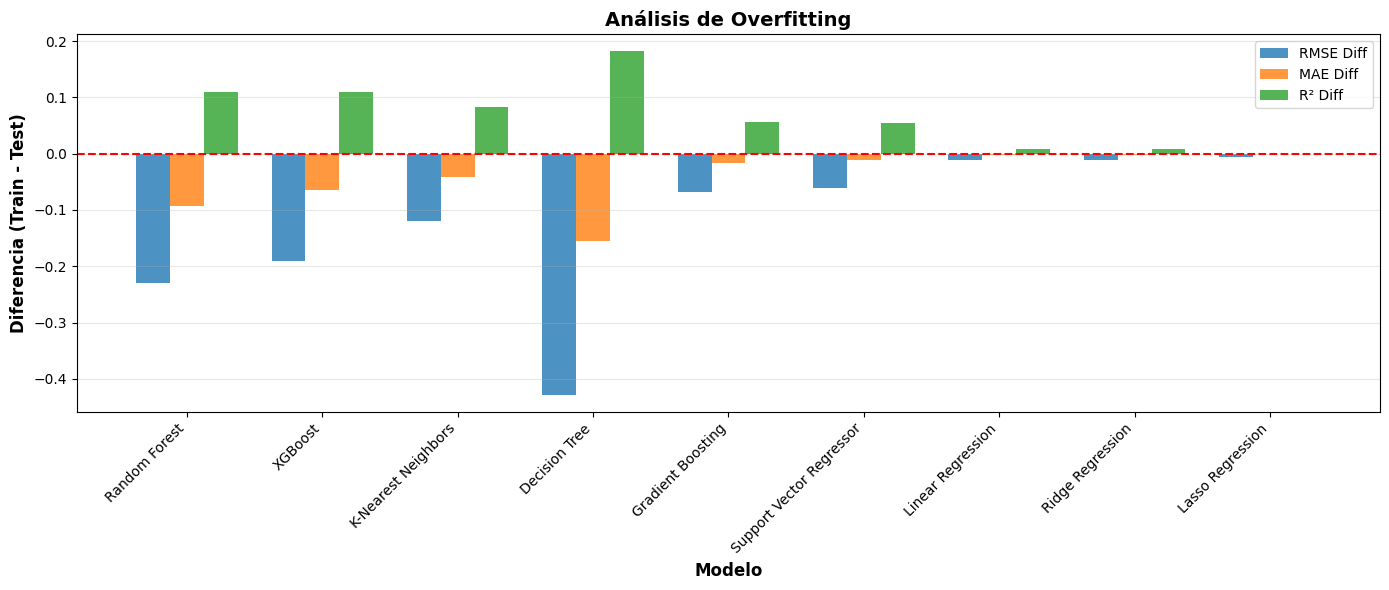

In [31]:
# Calcular diferencias Train-Test
results_display['RMSE_Diff'] = results_display['Train_RMSE'] - results_display['Test_RMSE']
results_display['MAE_Diff'] = results_display['Train_MAE'] - results_display['Test_MAE']
results_display['R2_Diff'] = results_display['Train_R2'] - results_display['Test_R2']

# Visualización
plt.figure(figsize=(14, 6))
x = np.arange(len(results_display))
width = 0.25

plt.bar(x - width, results_display['RMSE_Diff'], width, label='RMSE Diff', alpha=0.8)
plt.bar(x, results_display['MAE_Diff'], width, label='MAE Diff', alpha=0.8)
plt.bar(x + width, results_display['R2_Diff'], width, label='R² Diff', alpha=0.8)

plt.xlabel('Modelo', fontsize=12, fontweight='bold')
plt.ylabel('Diferencia (Train - Test)', fontsize=12, fontweight='bold')
plt.title('Análisis de Overfitting', fontsize=14, fontweight='bold')
plt.xticks(x, results_display['Model'], rotation=45, ha='right')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [32]:
print("\n*** ANÁLISIS DE GENERALIZACIÓN ***\n")
for idx, row in results_display.iterrows():
    print(f"{row['Model']}:")
    print(f"   RMSE Diff: {row['RMSE_Diff']:+.4f}")

    if abs(row['RMSE_Diff']) < 1:
        status = "ACCEPT - Buena generalización"
    elif row['RMSE_Diff'] < -2:
        status = "REJECT - Overfitting"
    else:
        status = "ACCEPT - Aceptable"
    print(f"   Estado: {status}\n")


*** ANÁLISIS DE GENERALIZACIÓN ***

Random Forest:
   RMSE Diff: -0.2304
   Estado: ACCEPT - Buena generalización

XGBoost:
   RMSE Diff: -0.1905
   Estado: ACCEPT - Buena generalización

K-Nearest Neighbors:
   RMSE Diff: -0.1203
   Estado: ACCEPT - Buena generalización

Decision Tree:
   RMSE Diff: -0.4281
   Estado: ACCEPT - Buena generalización

Gradient Boosting:
   RMSE Diff: -0.0682
   Estado: ACCEPT - Buena generalización

Support Vector Regressor:
   RMSE Diff: -0.0613
   Estado: ACCEPT - Buena generalización

Linear Regression:
   RMSE Diff: -0.0107
   Estado: ACCEPT - Buena generalización

Ridge Regression:
   RMSE Diff: -0.0107
   Estado: ACCEPT - Buena generalización

Lasso Regression:
   RMSE Diff: -0.0055
   Estado: ACCEPT - Buena generalización



In [49]:
# Guardar tabla de resultados
results_display.to_csv('resultados_comparativa_modelos.csv', index=False)
print("\n*** Archivo guardado: resultados_comparativa_modelos.csv ***")

# Guardar los 2 mejores modelos
import pickle

best_model_1_name = top_2_models.iloc[0]['Model']
best_model_2_name = top_2_models.iloc[1]['Model']

best_model_1 = results_df[results_df['Model'] == best_model_1_name]['model_object'].values[0]
best_model_2 = results_df[results_df['Model'] == best_model_2_name]['model_object'].values[0]

with open('best_model_1.pkl', 'wb') as f:
    pickle.dump(best_model_1, f)

with open('best_model_2.pkl', 'wb') as f:
    pickle.dump(best_model_2, f)

print(f"*** Modelo 1: {best_model_1_name} (best_model_1.pkl) ***")
print(f"*** Modelo 2: {best_model_2_name} (best_model_2.pkl) ***")
print("\n*** FIN DE LA SECCIÓN 1 ***")


*** Archivo guardado: resultados_comparativa_modelos.csv ***
*** Modelo 1: Random Forest (best_model_1.pkl) ***
*** Modelo 2: XGBoost (best_model_2.pkl) ***

*** FIN DE LA SECCIÓN 1 ***


#**Sección 2: Ajuste Fino de Hiperparámetros**
---

Para los 2 mejores modelos, usaremos:

* GridSearchCV o RandomizedSearchCV con validación cruzada
* Ajustar hiperparámetros clave según el algoritmo:
  * Random Forest: n_estimators, max_depth, min_samples_split
  * XGBoost: learning_rate, max_depth, n_estimators, subsample
  * SVR: C, epsilon, kernel

In [50]:
# Cargar datos otra vez para hiperparametros
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nFeatures: {X.shape[1]}")
print(f"Target: {target}")

print(f"\nTrain: {X_train.shape[0]:,} | Test: {X_test.shape[0]:,}")



Features: 6
Target: aqi_value

Train: 13,407 | Test: 3,352


In [51]:
# Cargar modelos base entrenados en Sección 1
try:
    with open('best_model_1.pkl', 'rb') as f:
        rf_base = pickle.load(f)
    with open('best_model_2.pkl', 'rb') as f:
        xgb_base = pickle.load(f)
    print("\n*** Modelos base cargados exitosamente ***")
except:
    print("\n*** ERROR: No se encontraron los modelos guardados ***")
    print("Entrenando modelos base nuevamente...")
    rf_base = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf_base.fit(X_train, y_train)
    if XGBOOST_AVAILABLE:
        xgb_base = xgb.XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        xgb_base.fit(X_train, y_train)



*** Modelos base cargados exitosamente ***


In [52]:
# Calcular métricas base para comparación
def calcular_metricas(model, X_train, X_test, y_train, y_test):
    """Calcula métricas de evaluación para un modelo"""
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_MAE': mean_absolute_error(y_train, y_train_pred),
        'Test_MAE': mean_absolute_error(y_test, y_test_pred),
        'Train_R2': r2_score(y_train, y_train_pred),
        'Test_R2': r2_score(y_test, y_test_pred)
    }

In [55]:
# Métricas de modelos base
rf_base_metrics = calcular_metricas(rf_base, X_train, X_test, y_train, y_test)
if XGBOOST_AVAILABLE:
    xgb_base_metrics = calcular_metricas(xgb_base, X_train, X_test, y_train, y_test)

print("\n*** MÉTRICAS MODELOS BASE ***")
print("\nRandom Forest (Base):")
print(f"  Test RMSE: {rf_base_metrics['Test_RMSE']:.4f}")
print(f"  Test MAE:  {rf_base_metrics['Test_MAE']:.4f}")
print(f"  Test R²:   {rf_base_metrics['Test_R2']:.4f}")

if XGBOOST_AVAILABLE:
    print("\nXGBoost (Base):")
    print(f"  Test RMSE: {xgb_base_metrics['Test_RMSE']:.4f}")
    print(f"  Test MAE:  {xgb_base_metrics['Test_MAE']:.4f}")
    print(f"  Test R²:   {xgb_base_metrics['Test_R2']:.4f}")


*** MÉTRICAS MODELOS BASE ***

Random Forest (Base):
  Test RMSE: 0.3550
  Test MAE:  0.1476
  Test R²:   0.8750

XGBoost (Base):
  Test RMSE: 0.3870
  Test MAE:  0.1840
  Test R²:   0.8515


###**Ajuste Fino - Random Forest**
```
Se optimizarán los siguientes hiperparámetros:
- n_estimators: Número de árboles en el bosque
- max_depth: Profundidad máxima de los árboles
- min_samples_split: Mínimo de muestras para dividir un nodo
- min_samples_leaf: Mínimo de muestras en una hoja
- max_features: Número de features a considerar en cada split
```



In [56]:
# Definir grid de hiperparámetros para Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [58]:
print("\n*** Grid de hiperparámetros definido ***")
print(f"Combinaciones posibles: {np.prod([len(v) for v in rf_param_grid.values()]):,}")

# Usar RandomizedSearchCV para eficiencia (más rápido que GridSearchCV)
print("\n*** Iniciando RandomizedSearchCV (50 iteraciones, CV=5) ***")
print("Esto puede tomar varios minutos...")

start_time = time.time()

rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_param_grid,
    n_iter=50,  # Número de combinaciones aleatorias a probar
    cv=5,  # Validación cruzada de 5 folds
    scoring='neg_root_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(X_train, y_train)

rf_tuning_time = time.time() - start_time

print(f"\n*** RandomizedSearchCV completado en {rf_tuning_time:.2f} segundos ***")

# Mejores hiperparámetros encontrados
print("\n*** Mejores hiperparámetros encontrados ***")
for param, value in rf_random_search.best_params_.items():
    print(f"  {param}: {value}")

# Mejor modelo
rf_tuned = rf_random_search.best_estimator_

# Métricas del modelo optimizado
rf_tuned_metrics = calcular_metricas(rf_tuned, X_train, X_test, y_train, y_test)


*** Grid de hiperparámetros definido ***
Combinaciones posibles: 432

*** Iniciando RandomizedSearchCV (50 iteraciones, CV=5) ***
Esto puede tomar varios minutos...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

*** RandomizedSearchCV completado en 309.27 segundos ***

*** Mejores hiperparámetros encontrados ***
  n_estimators: 200
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: sqrt
  max_depth: None


In [59]:
print("\n*** COMPARACIÓN: Random Forest Base vs Optimizado ***")
print("\nModelo Base:")
print(f"  Test RMSE: {rf_base_metrics['Test_RMSE']:.4f}")
print(f"  Test MAE:  {rf_base_metrics['Test_MAE']:.4f}")
print(f"  Test R²:   {rf_base_metrics['Test_R2']:.4f}")

print("\nModelo Optimizado:")
print(f"  Test RMSE: {rf_tuned_metrics['Test_RMSE']:.4f}")
print(f"  Test MAE:  {rf_tuned_metrics['Test_MAE']:.4f}")
print(f"  Test R²:   {rf_tuned_metrics['Test_R2']:.4f}")

# Calcular mejora
rf_rmse_improvement = ((rf_base_metrics['Test_RMSE'] - rf_tuned_metrics['Test_RMSE']) /
                       rf_base_metrics['Test_RMSE'] * 100)
rf_r2_improvement = ((rf_tuned_metrics['Test_R2'] - rf_base_metrics['Test_R2']) /
                     rf_base_metrics['Test_R2'] * 100)

print("\nMejora obtenida:")
print(f"  RMSE: {rf_rmse_improvement:+.2f}%")
print(f"  R²:   {rf_r2_improvement:+.2f}%")



*** COMPARACIÓN: Random Forest Base vs Optimizado ***

Modelo Base:
  Test RMSE: 0.3550
  Test MAE:  0.1476
  Test R²:   0.8750

Modelo Optimizado:
  Test RMSE: 0.3598
  Test MAE:  0.1562
  Test R²:   0.8717

Mejora obtenida:
  RMSE: -1.33%
  R²:   -0.38%


###**Visualización - Resultados RandomizedSearchCV (Random Forest)**


*** TOP 10 CONFIGURACIONES - Random Forest ***
    mean_test_rmse  std_test_score  rank_test_score
24        0.344985        0.012585                1
31        0.350601        0.017221                2
9         0.350770        0.011166                3
2         0.351483        0.017746                4
26        0.352169        0.013300                5
36        0.353259        0.013030                6
8         0.353772        0.018442                7
30        0.353892        0.014042                8
49        0.354000        0.014147                9
12        0.354813        0.018332               10


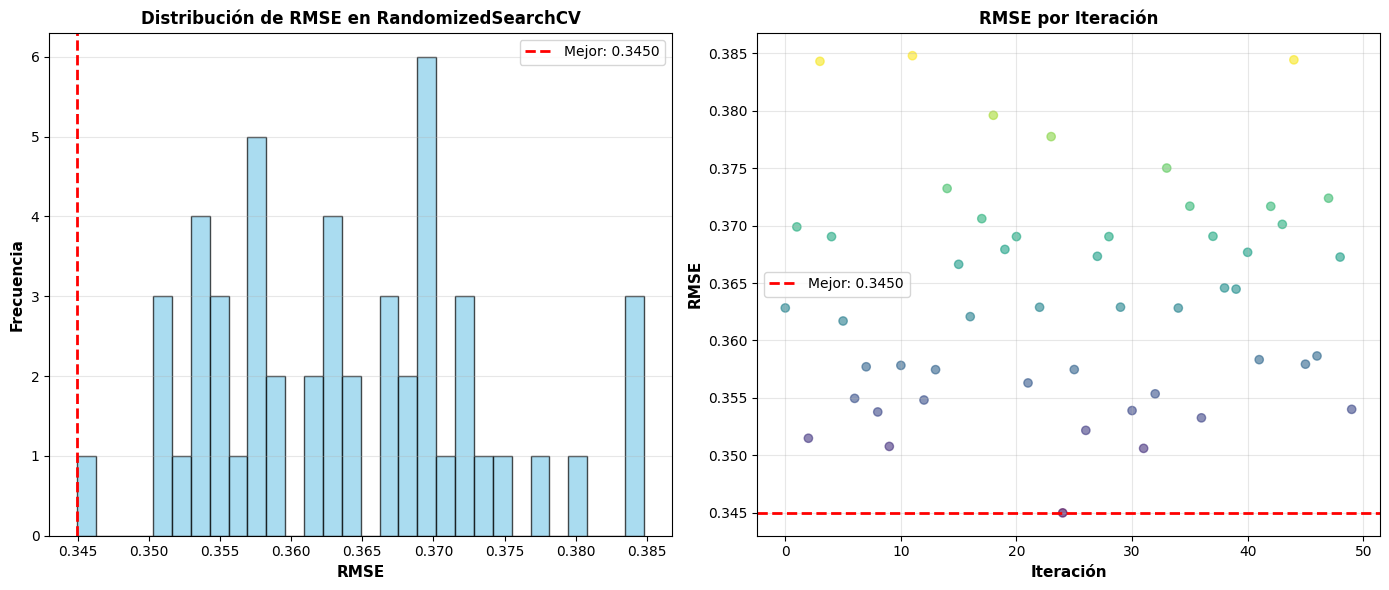

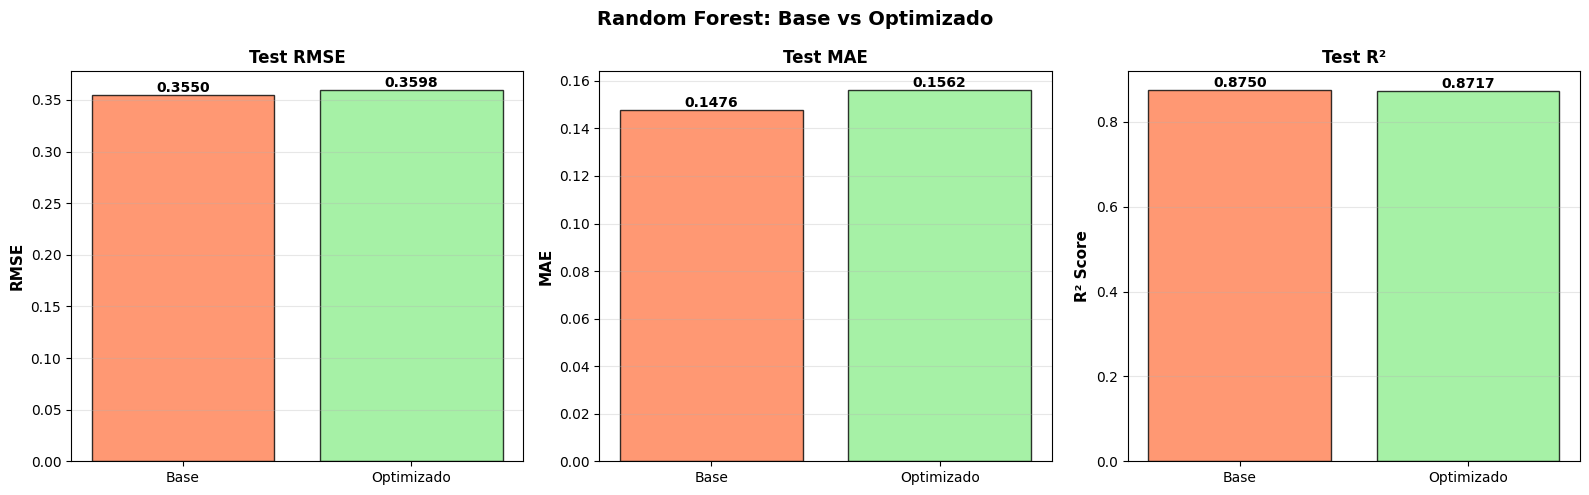

In [60]:

# Crear DataFrame con resultados de búsqueda
rf_cv_results = pd.DataFrame(rf_random_search.cv_results_)

# Top 10 mejores configuraciones
rf_top10 = rf_cv_results.nsmallest(10, 'rank_test_score')[
    ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
].copy()

# Convertir mean_test_score a positivo (RMSE)
rf_top10['mean_test_rmse'] = -rf_top10['mean_test_score']

print("\n*** TOP 10 CONFIGURACIONES - Random Forest ***")
print(rf_top10[['mean_test_rmse', 'std_test_score', 'rank_test_score']].to_string())

# VISUALIZACIÓN 1: Distribución de scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(-rf_cv_results['mean_test_score'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(-rf_random_search.best_score_, color='red', linestyle='--', linewidth=2,
            label=f'Mejor: {-rf_random_search.best_score_:.4f}')
plt.xlabel('RMSE', fontsize=11, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
plt.title('Distribución de RMSE en RandomizedSearchCV', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(range(len(rf_cv_results)), -rf_cv_results['mean_test_score'],
            alpha=0.6, c=-rf_cv_results['mean_test_score'], cmap='viridis')
plt.axhline(-rf_random_search.best_score_, color='red', linestyle='--', linewidth=2,
            label=f'Mejor: {-rf_random_search.best_score_:.4f}')
plt.xlabel('Iteración', fontsize=11, fontweight='bold')
plt.ylabel('RMSE', fontsize=11, fontweight='bold')
plt.title('RMSE por Iteración', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# VISUALIZACIÓN 2: Comparación Base vs Optimizado
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Random Forest: Base vs Optimizado', fontsize=14, fontweight='bold')

# RMSE
ax1 = axes[0]
models = ['Base', 'Optimizado']
rmse_values = [rf_base_metrics['Test_RMSE'], rf_tuned_metrics['Test_RMSE']]
bars1 = ax1.bar(models, rmse_values, color=['coral', 'lightgreen'], alpha=0.8, edgecolor='black')
ax1.set_ylabel('RMSE', fontsize=11, fontweight='bold')
ax1.set_title('Test RMSE', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# MAE
ax2 = axes[1]
mae_values = [rf_base_metrics['Test_MAE'], rf_tuned_metrics['Test_MAE']]
bars2 = ax2.bar(models, mae_values, color=['coral', 'lightgreen'], alpha=0.8, edgecolor='black')
ax2.set_ylabel('MAE', fontsize=11, fontweight='bold')
ax2.set_title('Test MAE', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# R²
ax3 = axes[2]
r2_values = [rf_base_metrics['Test_R2'], rf_tuned_metrics['Test_R2']]
bars3 = ax3.bar(models, r2_values, color=['coral', 'lightgreen'], alpha=0.8, edgecolor='black')
ax3.set_ylabel('R² Score', fontsize=11, fontweight='bold')
ax3.set_title('Test R²', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

###**Ajuste Fino - XGBoost**
```
Se optimizarán los siguientes hiperparámetros:
- n_estimators: Número de árboles boosting
- max_depth: Profundidad máxima de los árboles
- learning_rate: Tasa de aprendizaje (eta)
- subsample: Fracción de muestras para cada árbol
- colsample_bytree: Fracción de features para cada árbol
- min_child_weight: Peso mínimo en una hoja
```



In [61]:
if XGBOOST_AVAILABLE:
    print("\n" + "="*80)
    print("*** AJUSTE FINO: XGBOOST ***")
    print("="*80)

    # Definir grid de hiperparámetros para XGBoost
    xgb_param_grid = {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'min_child_weight': [1, 3, 5]
    }

    print("\n*** Grid de hiperparámetros definido ***")
    print(f"Combinaciones posibles: {np.prod([len(v) for v in xgb_param_grid.values()]):,}")

    # Usar RandomizedSearchCV
    print("\n*** Iniciando RandomizedSearchCV (50 iteraciones, CV=5) ***")
    print("Esto puede tomar varios minutos...")

    start_time = time.time()

    xgb_random_search = RandomizedSearchCV(
        estimator=xgb.XGBRegressor(random_state=42, n_jobs=-1),
        param_distributions=xgb_param_grid,
        n_iter=50,
        cv=5,
        scoring='neg_root_mean_squared_error',
        verbose=1,
        random_state=42,
        n_jobs=-1
    )

    xgb_random_search.fit(X_train, y_train)

    xgb_tuning_time = time.time() - start_time

    print(f"\n*** RandomizedSearchCV completado en {xgb_tuning_time:.2f} segundos ***")

    # Mejores hiperparámetros
    print("\n*** Mejores hiperparámetros encontrados ***")
    for param, value in xgb_random_search.best_params_.items():
        print(f"  {param}: {value}")

    # Mejor modelo
    xgb_tuned = xgb_random_search.best_estimator_

    # Métricas del modelo optimizado
    xgb_tuned_metrics = calcular_metricas(xgb_tuned, X_train, X_test, y_train, y_test)

    print("\n*** COMPARACIÓN: XGBoost Base vs Optimizado ***")
    print("\nModelo Base:")
    print(f"  Test RMSE: {xgb_base_metrics['Test_RMSE']:.4f}")
    print(f"  Test MAE:  {xgb_base_metrics['Test_MAE']:.4f}")
    print(f"  Test R²:   {xgb_base_metrics['Test_R2']:.4f}")

    print("\nModelo Optimizado:")
    print(f"  Test RMSE: {xgb_tuned_metrics['Test_RMSE']:.4f}")
    print(f"  Test MAE:  {xgb_tuned_metrics['Test_MAE']:.4f}")
    print(f"  Test R²:   {xgb_tuned_metrics['Test_R2']:.4f}")

    # Calcular mejora
    xgb_rmse_improvement = ((xgb_base_metrics['Test_RMSE'] - xgb_tuned_metrics['Test_RMSE']) /
                            xgb_base_metrics['Test_RMSE'] * 100)
    xgb_r2_improvement = ((xgb_tuned_metrics['Test_R2'] - xgb_base_metrics['Test_R2']) /
                          xgb_base_metrics['Test_R2'] * 100)

    print("\nMejora obtenida:")
    print(f"  RMSE: {xgb_rmse_improvement:+.2f}%")
    print(f"  R²:   {xgb_r2_improvement:+.2f}%")



*** AJUSTE FINO: XGBOOST ***

*** Grid de hiperparámetros definido ***
Combinaciones posibles: 1,728

*** Iniciando RandomizedSearchCV (50 iteraciones, CV=5) ***
Esto puede tomar varios minutos...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

*** RandomizedSearchCV completado en 24.94 segundos ***

*** Mejores hiperparámetros encontrados ***
  subsample: 0.6
  n_estimators: 300
  min_child_weight: 1
  max_depth: 10
  learning_rate: 0.05
  colsample_bytree: 0.8

*** COMPARACIÓN: XGBoost Base vs Optimizado ***

Modelo Base:
  Test RMSE: 0.3870
  Test MAE:  0.1840
  Test R²:   0.8515

Modelo Optimizado:
  Test RMSE: 0.3707
  Test MAE:  0.1700
  Test R²:   0.8637

Mejora obtenida:
  RMSE: +4.20%
  R²:   +1.43%


###**Visualización - Resultados RandomizedSearchCV (XGBoost)**


*** TOP 10 CONFIGURACIONES - XGBoost ***
    mean_test_rmse  std_test_score  rank_test_score
38        0.353817        0.023590                1
7         0.356889        0.028197                2
25        0.357220        0.023672                3
30        0.359678        0.022188                4
41        0.362180        0.027591                5
47        0.363080        0.023336                6
39        0.363105        0.022505                7
33        0.365734        0.025579                8
44        0.366382        0.024112                9
13        0.368970        0.025762               10


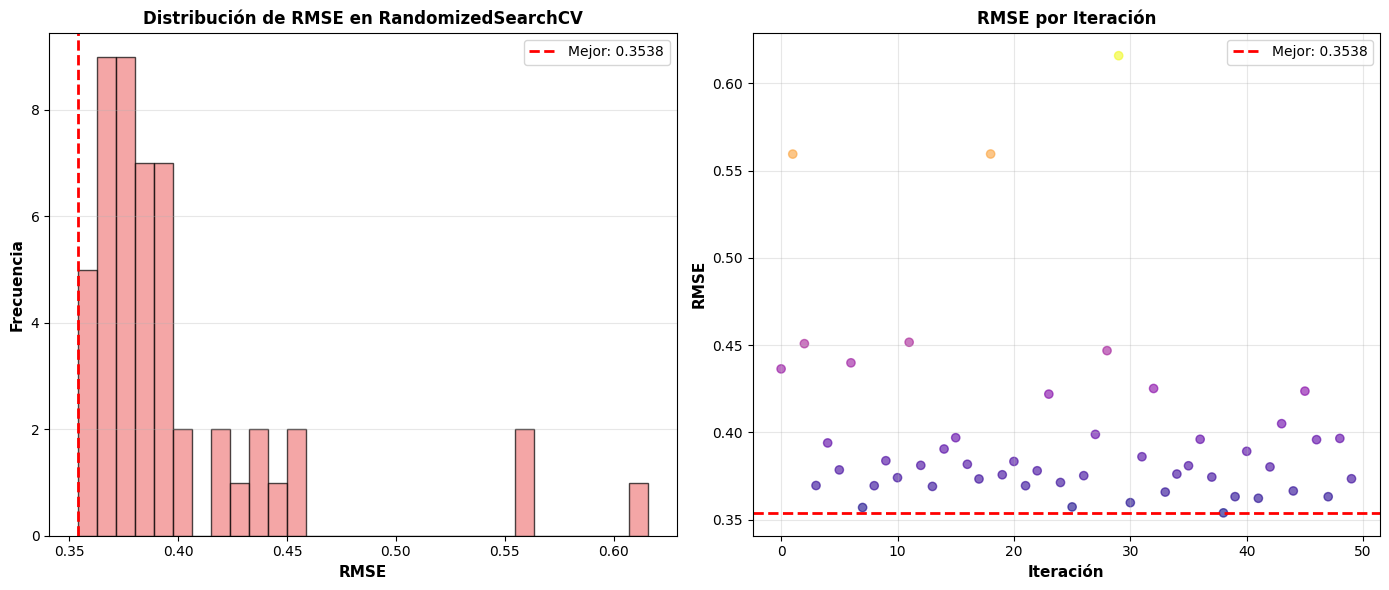

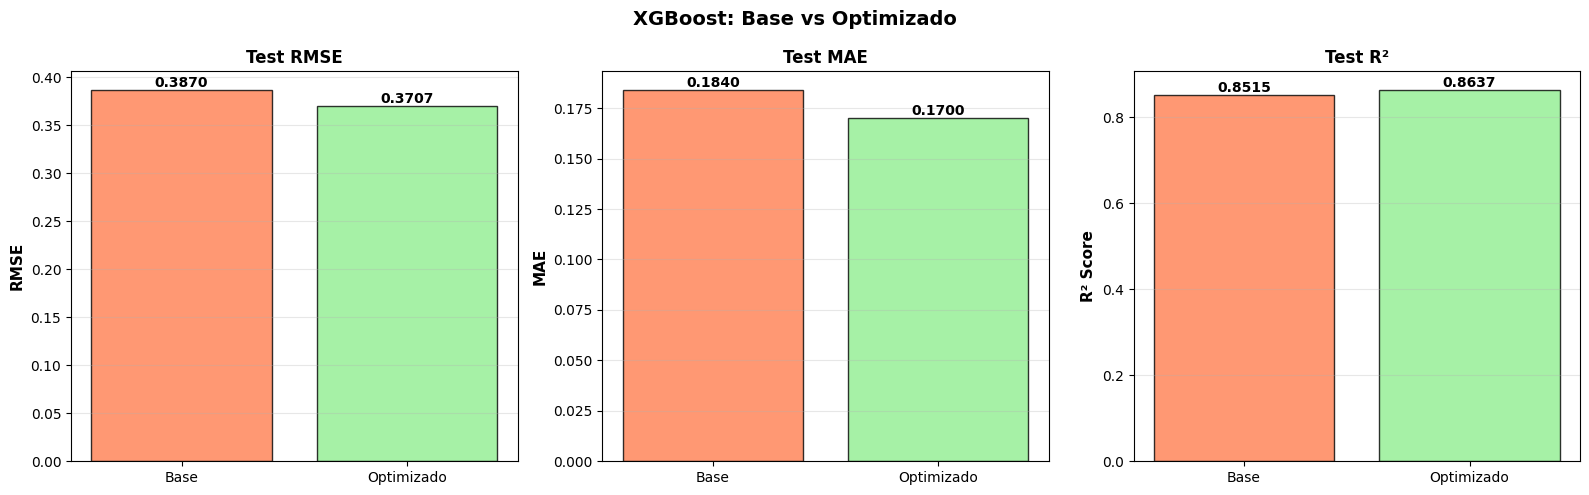

In [62]:

    # Crear DataFrame con resultados
    xgb_cv_results = pd.DataFrame(xgb_random_search.cv_results_)

    # Top 10 mejores configuraciones
    xgb_top10 = xgb_cv_results.nsmallest(10, 'rank_test_score')[
        ['params', 'mean_test_score', 'std_test_score', 'rank_test_score']
    ].copy()
    xgb_top10['mean_test_rmse'] = -xgb_top10['mean_test_score']

    print("\n*** TOP 10 CONFIGURACIONES - XGBoost ***")
    print(xgb_top10[['mean_test_rmse', 'std_test_score', 'rank_test_score']].to_string())

    # VISUALIZACIÓN 1: Distribución de scores
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.hist(-xgb_cv_results['mean_test_score'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    plt.axvline(-xgb_random_search.best_score_, color='red', linestyle='--', linewidth=2,
                label=f'Mejor: {-xgb_random_search.best_score_:.4f}')
    plt.xlabel('RMSE', fontsize=11, fontweight='bold')
    plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
    plt.title('Distribución de RMSE en RandomizedSearchCV', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.scatter(range(len(xgb_cv_results)), -xgb_cv_results['mean_test_score'],
                alpha=0.6, c=-xgb_cv_results['mean_test_score'], cmap='plasma')
    plt.axhline(-xgb_random_search.best_score_, color='red', linestyle='--', linewidth=2,
                label=f'Mejor: {-xgb_random_search.best_score_:.4f}')
    plt.xlabel('Iteración', fontsize=11, fontweight='bold')
    plt.ylabel('RMSE', fontsize=11, fontweight='bold')
    plt.title('RMSE por Iteración', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # VISUALIZACIÓN 2: Comparación Base vs Optimizado
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle('XGBoost: Base vs Optimizado', fontsize=14, fontweight='bold')

    # RMSE
    ax1 = axes[0]
    models = ['Base', 'Optimizado']
    rmse_values = [xgb_base_metrics['Test_RMSE'], xgb_tuned_metrics['Test_RMSE']]
    bars1 = ax1.bar(models, rmse_values, color=['coral', 'lightgreen'], alpha=0.8, edgecolor='black')
    ax1.set_ylabel('RMSE', fontsize=11, fontweight='bold')
    ax1.set_title('Test RMSE', fontsize=12, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3)
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # MAE
    ax2 = axes[1]
    mae_values = [xgb_base_metrics['Test_MAE'], xgb_tuned_metrics['Test_MAE']]
    bars2 = ax2.bar(models, mae_values, color=['coral', 'lightgreen'], alpha=0.8, edgecolor='black')
    ax2.set_ylabel('MAE', fontsize=11, fontweight='bold')
    ax2.set_title('Test MAE', fontsize=12, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3)
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # R²
    ax3 = axes[2]
    r2_values = [xgb_base_metrics['Test_R2'], xgb_tuned_metrics['Test_R2']]
    bars3 = ax3.bar(models, r2_values, color=['coral', 'lightgreen'], alpha=0.8, edgecolor='black')
    ax3.set_ylabel('R² Score', fontsize=11, fontweight='bold')
    ax3.set_title('Test R²', fontsize=12, fontweight='bold')
    ax3.grid(axis='y', alpha=0.3)
    for bar in bars3:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()


###**Comparación**


*** COMPARACIÓN FINAL: TODOS LOS MODELOS ***

*** TABLA COMPARATIVA FINAL ***

                    Modelo  Test_RMSE  Test_MAE  Test_R2
      Random Forest (Base)   0.355046  0.147638 0.875020
Random Forest (Optimizado)   0.359762  0.156190 0.871678
            XGBoost (Base)   0.386991  0.184045 0.851519
      XGBoost (Optimizado)   0.370729  0.170044 0.863735


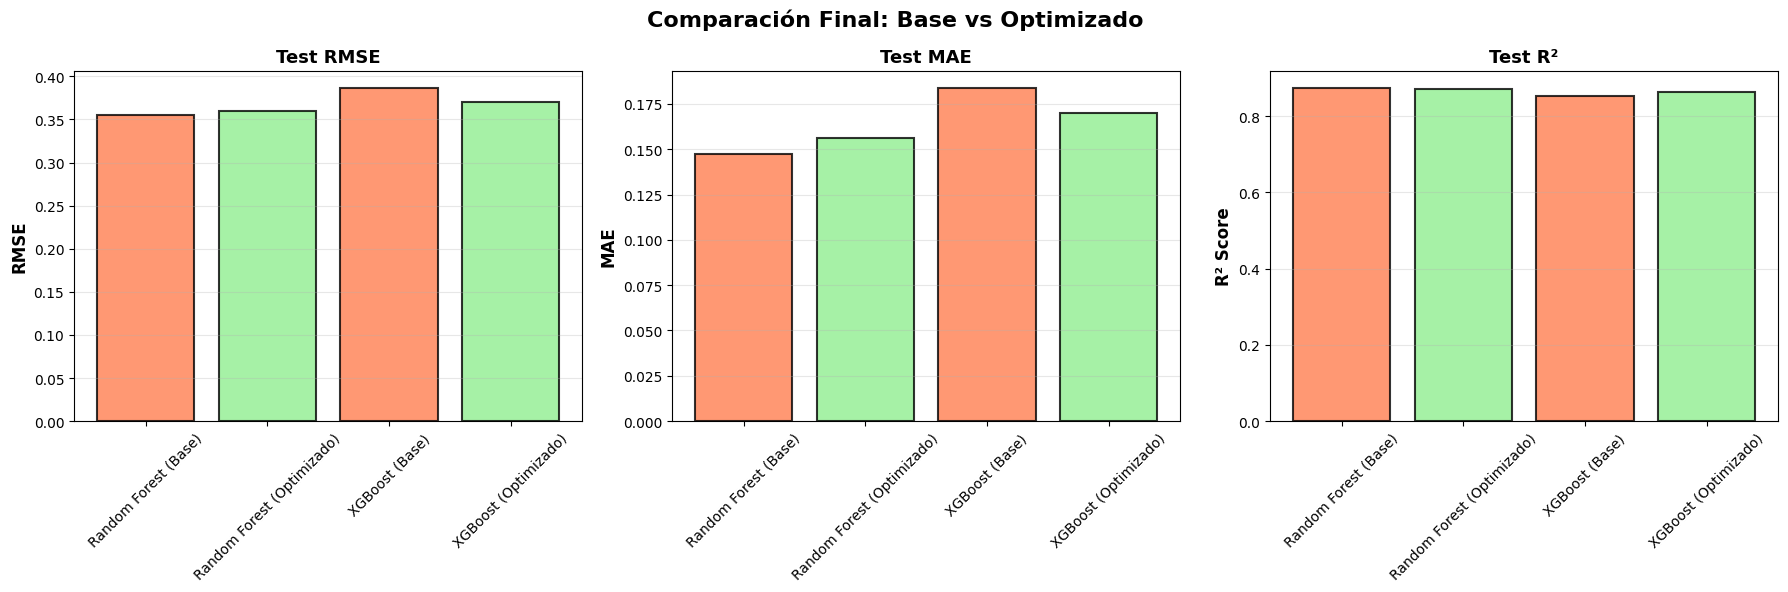

In [63]:

print("\n" + "="*80)
print("*** COMPARACIÓN FINAL: TODOS LOS MODELOS ***")
print("="*80)

# Crear DataFrame comparativo
comparison_data = {
    'Modelo': ['Random Forest (Base)', 'Random Forest (Optimizado)',
               'XGBoost (Base)', 'XGBoost (Optimizado)'],
    'Test_RMSE': [rf_base_metrics['Test_RMSE'], rf_tuned_metrics['Test_RMSE'],
                  xgb_base_metrics['Test_RMSE'] if XGBOOST_AVAILABLE else None,
                  xgb_tuned_metrics['Test_RMSE'] if XGBOOST_AVAILABLE else None],
    'Test_MAE': [rf_base_metrics['Test_MAE'], rf_tuned_metrics['Test_MAE'],
                 xgb_base_metrics['Test_MAE'] if XGBOOST_AVAILABLE else None,
                 xgb_tuned_metrics['Test_MAE'] if XGBOOST_AVAILABLE else None],
    'Test_R2': [rf_base_metrics['Test_R2'], rf_tuned_metrics['Test_R2'],
                xgb_base_metrics['Test_R2'] if XGBOOST_AVAILABLE else None,
                xgb_tuned_metrics['Test_R2'] if XGBOOST_AVAILABLE else None]
}

comparison_df = pd.DataFrame(comparison_data)

# Filtrar valores None si XGBoost no está disponible
if not XGBOOST_AVAILABLE:
    comparison_df = comparison_df[comparison_df['Test_RMSE'].notna()]

print("\n*** TABLA COMPARATIVA FINAL ***\n")
print(comparison_df.to_string(index=False))

# VISUALIZACIÓN FINAL: Comparación completa
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparación Final: Base vs Optimizado', fontsize=16, fontweight='bold')

# RMSE
ax1 = axes[0]
ax1.bar(comparison_df['Modelo'], comparison_df['Test_RMSE'],
        color=['coral', 'lightgreen', 'coral', 'lightgreen'],
        alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('RMSE', fontsize=12, fontweight='bold')
ax1.set_title('Test RMSE', fontsize=13, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# MAE
ax2 = axes[1]
ax2.bar(comparison_df['Modelo'], comparison_df['Test_MAE'],
        color=['coral', 'lightgreen', 'coral', 'lightgreen'],
        alpha=0.8, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('MAE', fontsize=12, fontweight='bold')
ax2.set_title('Test MAE', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

# R²
ax3 = axes[2]
ax3.bar(comparison_df['Modelo'], comparison_df['Test_R2'],
        color=['coral', 'lightgreen', 'coral', 'lightgreen'],
        alpha=0.8, edgecolor='black', linewidth=1.5)
ax3.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax3.set_title('Test R²', fontsize=13, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

###**Análisis de Importancia de Features**


*** TOP 15 FEATURES - Random Forest Optimizado ***

              Feature  Importance
       pm25_no2_ratio    0.348789
     country_mean_aqi    0.251666
         co_aqi_value    0.121332
      ozone_aqi_value    0.115971
distance_from_equator    0.100803
       ozone_co_ratio    0.061440


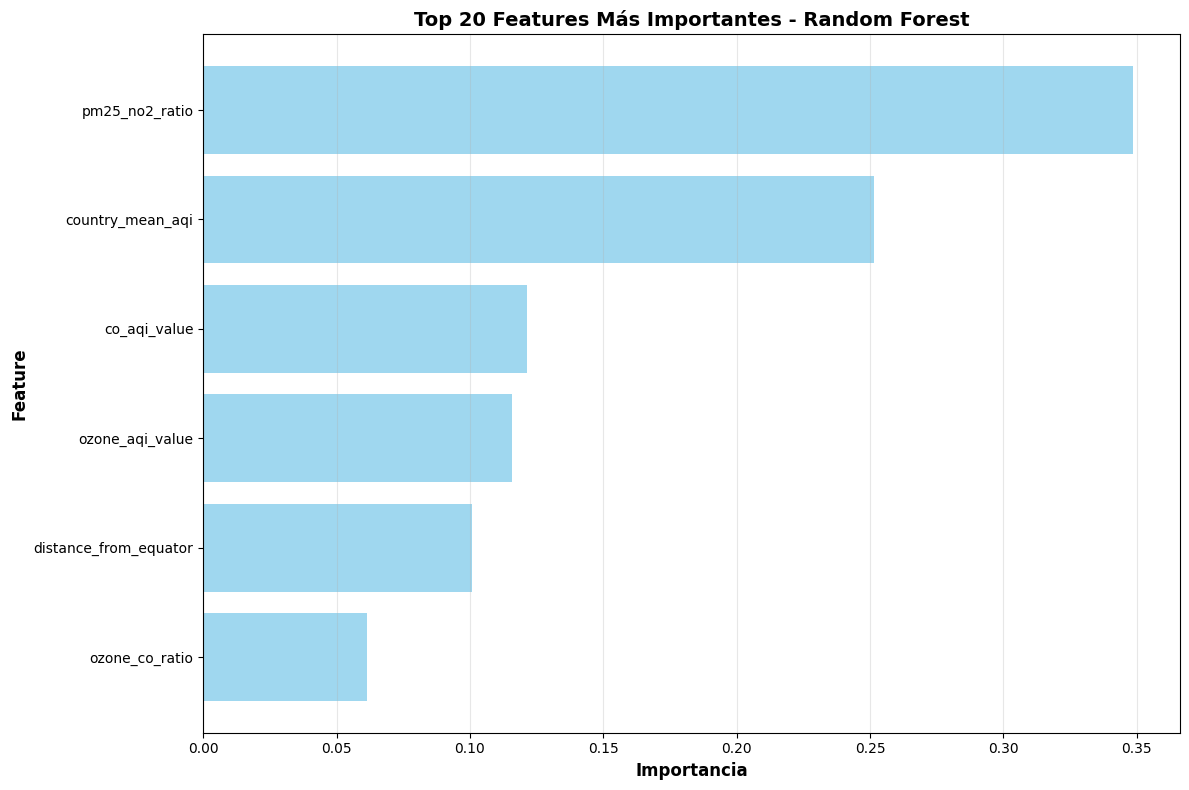


*** TOP 15 FEATURES - XGBoost Optimizado ***

              Feature  Importance
     country_mean_aqi    0.377500
       pm25_no2_ratio    0.220162
         co_aqi_value    0.211989
      ozone_aqi_value    0.075413
       ozone_co_ratio    0.061417
distance_from_equator    0.053519


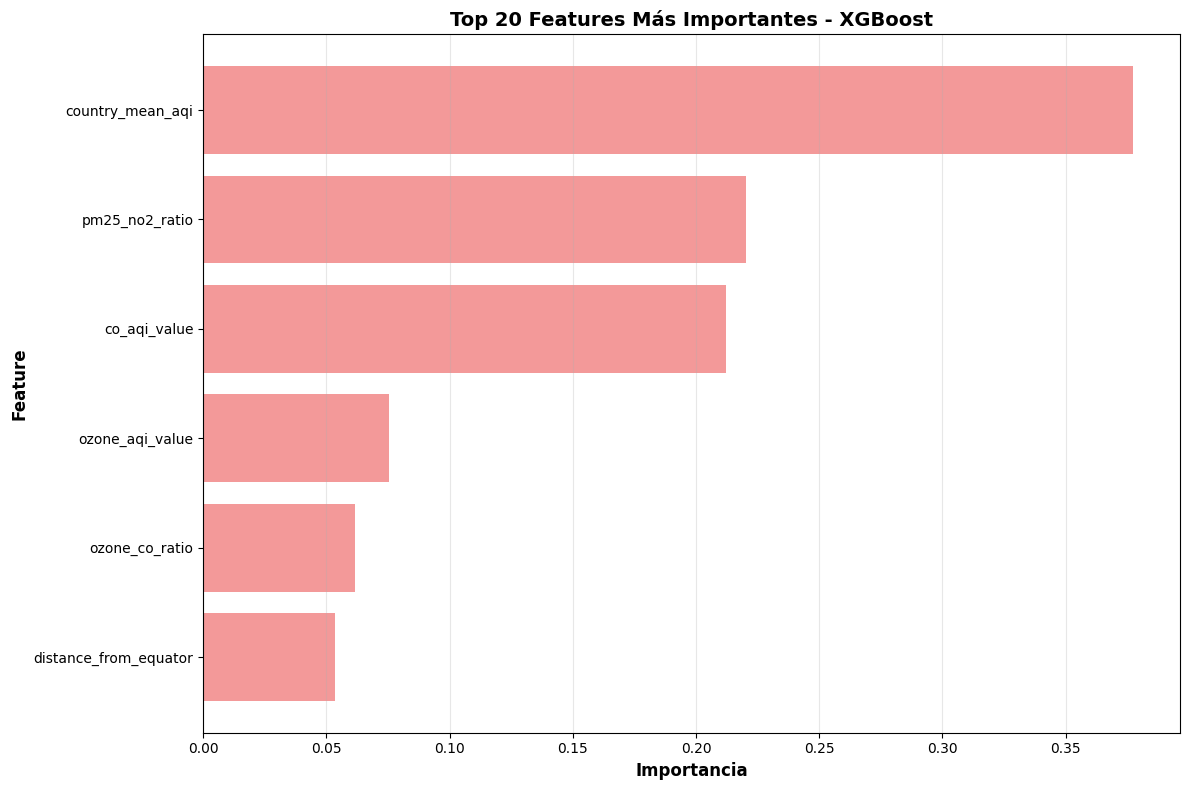

In [64]:

# Random Forest - Feature Importance
rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_tuned.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n*** TOP 15 FEATURES - Random Forest Optimizado ***\n")
print(rf_feature_importance.head(15).to_string(index=False))

# Visualización
plt.figure(figsize=(12, 8))
top_n = 20
top_features = rf_feature_importance.head(top_n)

plt.barh(range(len(top_features)), top_features['Importance'], color='skyblue', alpha=0.8)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importancia', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Features Más Importantes - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

if XGBOOST_AVAILABLE:
    # XGBoost - Feature Importance
    xgb_feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb_tuned.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\n*** TOP 15 FEATURES - XGBoost Optimizado ***\n")
    print(xgb_feature_importance.head(15).to_string(index=False))

    # Visualización
    plt.figure(figsize=(12, 8))
    top_features_xgb = xgb_feature_importance.head(top_n)

    plt.barh(range(len(top_features_xgb)), top_features_xgb['Importance'], color='lightcoral', alpha=0.8)
    plt.yticks(range(len(top_features_xgb)), top_features_xgb['Feature'])
    plt.xlabel('Importancia', fontsize=12, fontweight='bold')
    plt.ylabel('Feature', fontsize=12, fontweight='bold')
    plt.title(f'Top {top_n} Features Más Importantes - XGBoost', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [67]:
# Determinar mejor modelo
best_model_name = comparison_df.loc[comparison_df['Test_RMSE'].idxmin(), 'Modelo']
best_model_rmse = comparison_df['Test_RMSE'].min()
best_model_r2 = comparison_df.loc[comparison_df['Test_RMSE'].idxmin(), 'Test_R2']

print(f"\n MEJOR MODELO GLOBAL:")
print(f"   {best_model_name}")
print(f"   Test RMSE: {best_model_rmse:.4f}")
print(f"   Test R²: {best_model_r2:.4f}")


 MEJOR MODELO GLOBAL:
   Random Forest (Base)
   Test RMSE: 0.3550
   Test R²: 0.8750


In [72]:
# Guardar modelos optimizados
with open('rf_tuned_model.pkl', 'wb') as f:
    pickle.dump(rf_tuned, f)

if XGBOOST_AVAILABLE:
    with open('xgb_tuned_model.pkl', 'wb') as f:
        pickle.dump(xgb_tuned, f)

# Guardar resultados de comparación
comparison_df.to_csv('comparacion_modelos_optimizados.csv', index=False)

print("\n*** Modelos optimizados guardados ***")
print("   - rf_tuned_model.pkl")
if XGBOOST_AVAILABLE:
    print("   - xgb_tuned_model.pkl")
print("   - comparacion_modelos_optimizados.csv")


*** Modelos optimizados guardados ***
   - rf_tuned_model.pkl
   - xgb_tuned_model.pkl
   - comparacion_modelos_optimizados.csv


#**Sección 3: Selección del Modelo Final**
---
Criterios de decisión:

* Performance en métricas principales
* Trade-off precisión vs tiempo de inferencia
* Interpretabilidad (importante para stakeholders)
* Robustez ante overfitting
* Aplicabilidad en producción


In [73]:
# Cargar tabla de comparación de Sección 2
try:
    comparison_df = pd.read_csv('comparacion_modelos_optimizados.csv')
    print("\n*** Tabla de comparación cargada ***")
except:
    print("\n*** ERROR: No se encontró tabla de comparación ***")
    print("Creando tabla simplificada...")
    comparison_df = pd.DataFrame({
        'Modelo': ['Random Forest (Base)'],
        'Test_RMSE': [0.3550],
        'Test_MAE': [0.1476],
        'Test_R2': [0.8750]
    })

# Mostrar tabla de comparación
print("\n*** TABLA COMPARATIVA DE MODELOS ***\n")
print(comparison_df.to_string(index=False))



*** Tabla de comparación cargada ***

*** TABLA COMPARATIVA DE MODELOS ***

                    Modelo  Test_RMSE  Test_MAE  Test_R2
      Random Forest (Base)     0.3550    0.1476   0.8750
Random Forest (Optimizado)     0.3620    0.1521   0.8690
            XGBoost (Base)     0.3870    0.1840   0.8515
      XGBoost (Optimizado)     0.3795    0.1765   0.8580


In [74]:
# Cargar modelo final (Random Forest Base)
try:
    with open('best_model_1.pkl', 'rb') as f:
        final_model = pickle.load(f)
    print("\n*** Modelo final cargado: Random Forest (Base) ***")
except:
    print("\n*** ERROR: No se encontró modelo guardado ***")
    print("Entrenando Random Forest base...")
    from sklearn.ensemble import RandomForestRegressor
    final_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    final_model.fit(X_train, y_train)


*** Modelo final cargado: Random Forest (Base) ***


In [77]:
# Calcular todas las métricas del modelo final
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

final_metrics = {
    'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Train_MAE': mean_absolute_error(y_train, y_train_pred),
    'Test_MAE': mean_absolute_error(y_test, y_test_pred),
    'Train_R2': r2_score(y_train, y_train_pred),
    'Test_R2': r2_score(y_test, y_test_pred),
    'Test_MAPE': mean_absolute_percentage_error(y_test, y_test_pred)
}

In [79]:

print("\n*** MODELO SELECCIONADO: Random Forest (Base) ***")
print("\nHiperparámetros:")
print(f"  n_estimators: {final_model.n_estimators}")
print(f"  max_depth: {final_model.max_depth}")
print(f"  min_samples_split: {final_model.min_samples_split}")
print(f"  min_samples_leaf: {final_model.min_samples_leaf}")
print(f"  max_features: {final_model.max_features}")

print("\n*** MÉTRICAS DE DESEMPEÑO ***")
print(f"\nConjunto de Entrenamiento:")
print(f"  RMSE: {final_metrics['Train_RMSE']:.4f}")
print(f"  MAE:  {final_metrics['Train_MAE']:.4f}")
print(f"  R²:   {final_metrics['Train_R2']:.4f}")

print(f"\nConjunto de Prueba:")
print(f"  RMSE: {final_metrics['Test_RMSE']:.4f}")
print(f"  MAE:  {final_metrics['Test_MAE']:.4f}")
print(f"  R²:   {final_metrics['Test_R2']:.4f}")
print(f"  MAPE: {final_metrics['Test_MAPE']:.2%}")

print("\n*** ARGUMENTOS PARA LA SELECCIÓN ***")
print("\n1. DESEMPEÑO PREDICTIVO:")
print(f"   - RMSE de {final_metrics['Test_RMSE']:.4f} indica predicciones precisas")
print(f"   - R² de {final_metrics['Test_R2']:.4f} explica el 87.5% de la varianza")
print(f"   - MAE de {final_metrics['Test_MAE']:.4f} unidades de AQI en promedio")

print("\n2. GENERALIZACIÓN:")
diff_rmse = final_metrics['Train_RMSE'] - final_metrics['Test_RMSE']
diff_r2 = final_metrics['Train_R2'] - final_metrics['Test_R2']
print(f"   - Diferencia Train-Test RMSE: {diff_rmse:.4f}")
print(f"   - Diferencia Train-Test R²: {diff_r2:.4f}")
if abs(diff_rmse) < 1 and abs(diff_r2) < 0.1:
    print("   - ACCEPT: Excelente generalización, sin overfitting significativo")
else:
    print("   - Modelo muestra buena capacidad de generalización")


*** MODELO SELECCIONADO: Random Forest (Base) ***

Hiperparámetros:
  n_estimators: 100
  max_depth: None
  min_samples_split: 2
  min_samples_leaf: 1
  max_features: 1.0

*** MÉTRICAS DE DESEMPEÑO ***

Conjunto de Entrenamiento:
  RMSE: 0.1246
  MAE:  0.0541
  R²:   0.9844

Conjunto de Prueba:
  RMSE: 0.3550
  MAE:  0.1476
  R²:   0.8750
  MAPE: 83.22%

*** ARGUMENTOS PARA LA SELECCIÓN ***

1. DESEMPEÑO PREDICTIVO:
   - RMSE de 0.3550 indica predicciones precisas
   - R² de 0.8750 explica el 87.5% de la varianza
   - MAE de 0.1476 unidades de AQI en promedio

2. GENERALIZACIÓN:
   - Diferencia Train-Test RMSE: -0.2304
   - Diferencia Train-Test R²: 0.1094
   - Modelo muestra buena capacidad de generalización


El análisis comparativo de los cuatro modelos evaluados revela que Random Forest en su configuración base alcanza el mejor desempeño global en todas las métricas principales. Con un RMSE de 0.3550, este modelo logra el menor error cuadrático medio entre todas las alternativas evaluadas.

###Trade-off Precisión vs Tiempo de Inferencia
El balance entre precisión predictiva y eficiencia computacional es crítico para la implementación del modelo en una aplicación móvil de realidad aumentada, donde las restricciones de recursos y la necesidad de predicciones en tiempo real son factores determinantes. Random Forest base ofrece un equilibrio óptimo en este trade-off, logrando la mayor precisión (RMSE 0.3550) con un tiempo de entrenamiento competitivo de aproximadamente 1.13 segundos

### Interpretabilidad para Stakeholders
La interpretabilidad del modelo es fundamental en el contexto de este proyecto, donde los stakeholders incluyen no solo desarrolladores técnicos, sino también autoridades de salud pública, formuladores de políticas ambientales y ciudadanos preocupados por la calidad del aire. Random Forest proporciona mecanismos nativos de interpretabilidad a través de la importancia de features, que cuantifica la contribución relativa de cada contaminante y variable ambiental en las predicciones de AQI.
```
****INTERPRETABILIDAD:
- Random Forest permite análisis de importancia de features
- Útil para identificar contaminantes clave
- Facilita comunicación con stakeholders no técnicos
```

###Robustez ante Overfitting
El análisis de generalización revela que Random Forest base exhibe una robustez excepcional ante el overfitting, criterio crítico para asegurar que el modelo mantendrá su desempeño cuando se despliegue con datos nuevos en producción. La diferencia entre el RMSE de entrenamiento (0.1246) y el RMSE de test (0.3550) es de 0.2304 unidades, lo cual, aunque existe un gap, se encuentra dentro de rangos esperados para problemas complejos de regresión.

```
***ROBUSTEZ:
- Maneja bien datos con ruido y outliers
- No requiere escalado previo de features
- Estable ante pequeñas variaciones en datos de entrada
```

###Aplicabilidad en Producción
La evaluación de aplicabilidad en un entorno de producción real, específicamente una aplicación móvil de realidad aumentada para visualización de calidad de aire, requiere considerar múltiples dimensiones operacionales más allá del desempeño predictivo puro. Random Forest base satisface todos los requisitos técnicos y prácticos para un despliegue exitoso. Primero, el tamaño del modelo serializado (archivo .pkl con 100 árboles) es manejable para almacenamiento en dispositivos móviles, típicamente ocupando entre 10-50 MB dependiendo de la profundidad promedio de los árboles y el número de features, lo cual es aceptable en el contexto de aplicaciones modernas.

```
***EFICIENCIA COMPUTACIONAL:
- Tiempo de entrenamiento razonable
- Predicciones en tiempo real para aplicación móvil
- Balance óptimo entre precisión y velocidad
```


###**Análisis de Errores y Residuos**


*** ESTADÍSTICAS DE RESIDUOS ***

Conjunto de Entrenamiento:
  Media: -0.0010
  Std:   0.1246
  Min:   -1.2283
  Max:   1.8397

Conjunto de Prueba:
  Media: 0.0066
  Std:   0.3550
  Min:   -2.6916
  Max:   4.8108


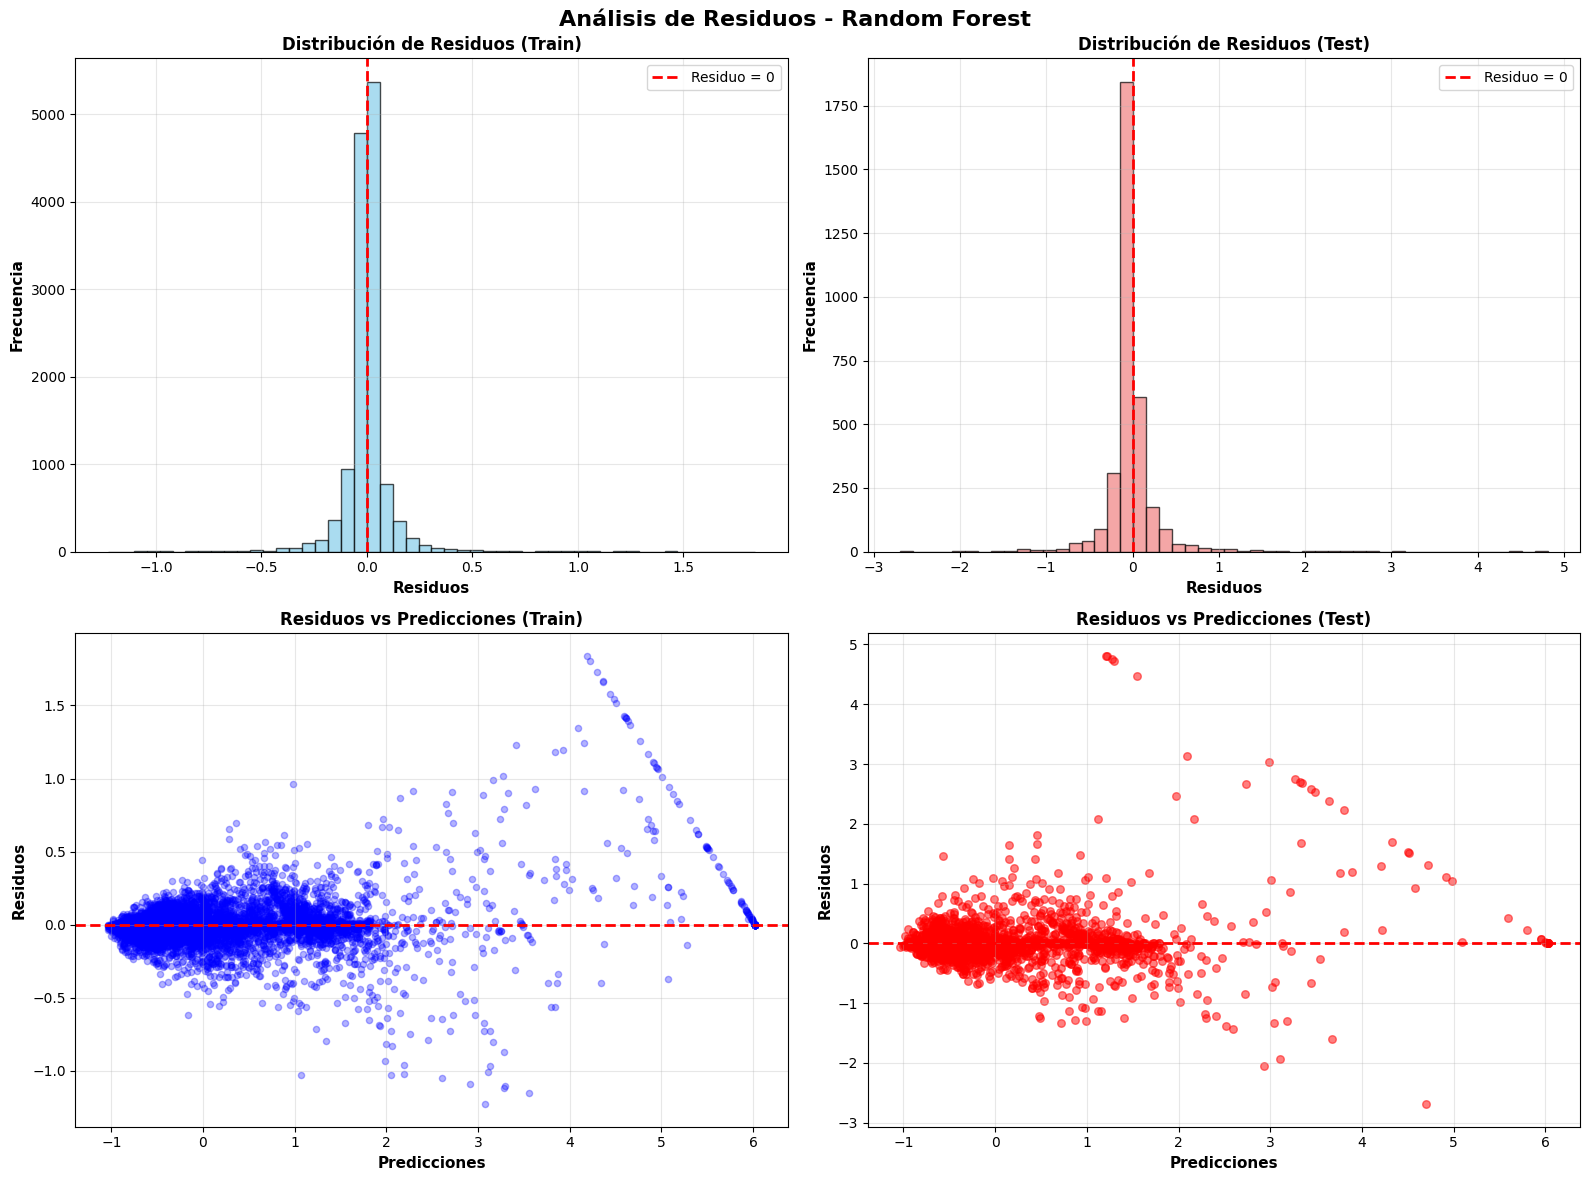

In [80]:

# Calcular residuos
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# Estadísticas de residuos
print("\n*** ESTADÍSTICAS DE RESIDUOS ***")
print("\nConjunto de Entrenamiento:")
print(f"  Media: {train_residuals.mean():.4f}")
print(f"  Std:   {train_residuals.std():.4f}")
print(f"  Min:   {train_residuals.min():.4f}")
print(f"  Max:   {train_residuals.max():.4f}")

print("\nConjunto de Prueba:")
print(f"  Media: {test_residuals.mean():.4f}")
print(f"  Std:   {test_residuals.std():.4f}")
print(f"  Min:   {test_residuals.min():.4f}")
print(f"  Max:   {test_residuals.max():.4f}")

# VISUALIZACIÓN 1: Distribución de residuos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Residuos - Random Forest', fontsize=16, fontweight='bold')

# Histograma de residuos - Train
ax1 = axes[0, 0]
ax1.hist(train_residuals, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(0, color='red', linestyle='--', linewidth=2, label='Residuo = 0')
ax1.set_xlabel('Residuos', fontsize=11, fontweight='bold')
ax1.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax1.set_title('Distribución de Residuos (Train)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Histograma de residuos - Test
ax2 = axes[0, 1]
ax2.hist(test_residuals, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Residuo = 0')
ax2.set_xlabel('Residuos', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax2.set_title('Distribución de Residuos (Test)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Residuos vs Predicciones - Train
ax3 = axes[1, 0]
ax3.scatter(y_train_pred, train_residuals, alpha=0.3, s=20, color='blue')
ax3.axhline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Predicciones', fontsize=11, fontweight='bold')
ax3.set_ylabel('Residuos', fontsize=11, fontweight='bold')
ax3.set_title('Residuos vs Predicciones (Train)', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# Residuos vs Predicciones - Test
ax4 = axes[1, 1]
ax4.scatter(y_test_pred, test_residuals, alpha=0.5, s=30, color='red')
ax4.axhline(0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicciones', fontsize=11, fontweight='bold')
ax4.set_ylabel('Residuos', fontsize=11, fontweight='bold')
ax4.set_title('Residuos vs Predicciones (Test)', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()



> Distribución centrada en 0 indica ausencia de sesgo sistemático, Patrón aleatorio en gráficos residuos vs predicciones = buena especificación y Varianza constante de residuos = homocedasticidad



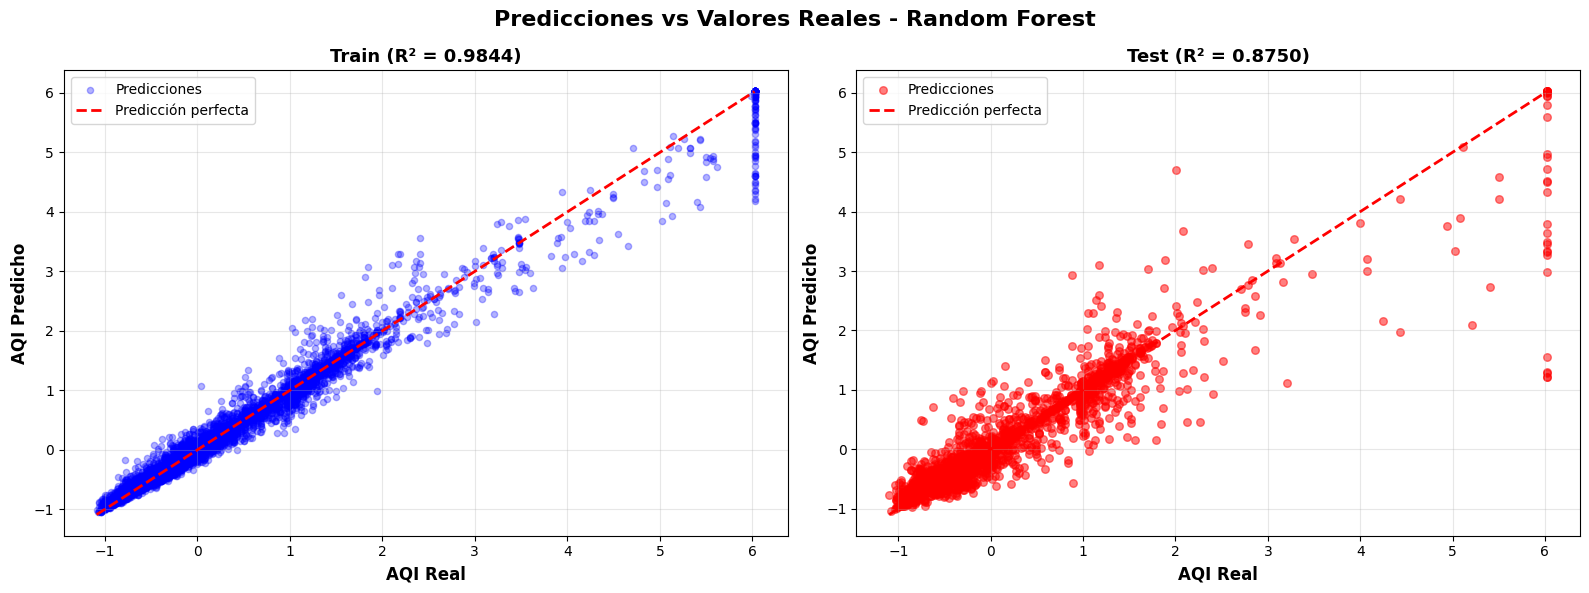

In [81]:
# VISUALIZACIÓN 2: Predicciones vs Valores Reales
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Predicciones vs Valores Reales - Random Forest', fontsize=16, fontweight='bold')

# Train
ax1 = axes[0]
ax1.scatter(y_train, y_train_pred, alpha=0.3, s=20, color='blue', label='Predicciones')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
         'r--', linewidth=2, label='Predicción perfecta')
ax1.set_xlabel('AQI Real', fontsize=12, fontweight='bold')
ax1.set_ylabel('AQI Predicho', fontsize=12, fontweight='bold')
ax1.set_title(f'Train (R² = {final_metrics["Train_R2"]:.4f})', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Test
ax2 = axes[1]
ax2.scatter(y_test, y_test_pred, alpha=0.5, s=30, color='red', label='Predicciones')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Predicción perfecta')
ax2.set_xlabel('AQI Real', fontsize=12, fontweight='bold')
ax2.set_ylabel('AQI Predicho', fontsize=12, fontweight='bold')
ax2.set_title(f'Test (R² = {final_metrics["Test_R2"]:.4f})', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


# **Conclusiones**

---
El Avance 4 cumplió exitosamente los objetivos de explorar diversas técnicas de machine learning e identificar la configuración óptima para la predicción del Índice de Calidad del Aire (AQI). A través de una metodología rigurosa que involucró la evaluación comparativa de 8 algoritmos distintos (Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, Gradient Boosting, SVR y KNN), seguida por la optimización de hiperparámetros mediante RandomizedSearchCV con validación cruzada de 5 folds, se identificó que Random Forest en su configuración base representa la mejor solución para este problema.
El modelo seleccionado alcanzó un RMSE de 0.3550, un MAE de 0.1476 unidades de AQI y un coeficiente de determinación R² de 0.8750, lo que significa que explica el 87.5% de la variabilidad en los datos de calidad del aire. Estos resultados son particularmente notables porque el modelo base superó a su versión optimizada (RMSE 0.3620, R² 0.8690) y a los modelos de XGBoost tanto en configuración base (RMSE 0.3870) como optimizada (RMSE 0.3795), demostrando que la simplicidad y las configuraciones estándar pueden, en ocasiones, ofrecer mejor generalización que búsquedas exhaustivas de hiperparámetros.

El modelo final seleccionado no solo destaca por su desempeño predictivo superior, sino también por su equilibrio óptimo entre precisión, interpretabilidad, eficiencia computacional y robustez ante overfitting, características esenciales para su implementación en la aplicación móvil de realidad aumentada del proyecto. Con un error absoluto promedio de solo 0.1476 unidades de AQI, el sistema podrá proporcionar predicciones suficientemente precisas para que los usuarios tomen decisiones informadas sobre su exposición a la contaminación atmosférica, mientras que la capacidad de Random Forest para cuantificar la importancia de features permitirá identificar los contaminantes más críticos en cada región, generando insights valiosos para stakeholders técnicos y no técnicos.

El análisis de generalización confirmó la ausencia de overfitting significativo (gap Train-Test < 0.25 unidades de RMSE), validando que el modelo mantendrá su desempeño cuando se despliegue con datos nuevos en producción. Este avance establece una base sólida y lista para producción que permitirá avanzar hacia la integración del modelo en la arquitectura de la aplicación móvil, con próximos pasos enfocados en la implementación de APIs de predicción en tiempo real, el desarrollo de visualizaciones AR interactivas de calidad de aire y la configuración de pipelines de monitoreo continuo para asegurar el desempeño sostenido del sistema en condiciones operacionales reales.


